## 1. Understanding the business

Bob has started his own mobile company. He wants to give tough fight to big companies like Apple,Samsung etc.

He does not know how to estimate price of mobiles his company creates. In this competitive mobile phone market you cannot simply assume things. To solve this problem he collects sales data of mobile phones of various companies.

Bob wants to find out some relation between features of a mobile phone(eg:- RAM,Internal Memory etc) and its selling price. But he is not so good at Machine Learning. So he needs your help to solve this problem.

**Features**


**Target Variable**
- `price_range`

## 2. Data Working

### 2.1. Imports

In [76]:
# basic imports
import pandas as pd
import numpy as np

# visualization imports
import matplotlib.pyplot as plt
import seaborn as sns

# warnings
import warnings
warnings.filterwarnings('ignore')

# model selection
from sklearn.model_selection import train_test_split, cross_val_score

# preprocessing and feature eng
from sklearn.preprocessing import RobustScaler
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import StackingRegressor 

# models
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor

# metrics



### 2.2. Notebook Options

In [49]:
# Set table to show all columns
pd.set_option('display.max_columns', None)

# Seaborn Settings
sns.set_theme(style="whitegrid", palette="Dark2")

# Global Values
SEED = 99

### 2.3. Dataset Imports

In [50]:
# Read train dataset 
df = pd.read_csv('CSV\mobile.csv', index_col=0)

## 3. Data Check & Inspection

In [51]:
df.head()

,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
battery_power,,,,,,,,,,,,,,,,,,,,
842,0,2.2,0.0,1,0,7,0.6,188.0,2,2,20,756,2549,9,7,19,0,0,1,1
1021,1,0.5,1.0,0,1,53,0.7,136.0,3,6,905,1988,2631,17,3,7,1,1,0,2
563,1,0.5,1.0,2,1,41,0.9,145.0,5,6,1263,1716,2603,11,2,9,1,1,0,2
615,1,2.5,0.0,0,0,10,0.8,131.0,6,9,1216,1786,2769,16,8,11,1,0,0,2
1821,1,1.2,0.0,13,1,44,0.6,141.0,2,14,1208,1212,1411,8,2,15,1,1,0,1


In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3000 entries, 842 to 1000
Data columns (total 20 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   blue          3000 non-null   int64  
 1   clock_speed   3000 non-null   float64
 2   dual_sim      3000 non-null   float64
 3   fc            3000 non-null   int64  
 4   four_g        3000 non-null   int64  
 5   int_memory    3000 non-null   int64  
 6   m_dep         3000 non-null   float64
 7   mobile_wt     3000 non-null   float64
 8   n_cores       3000 non-null   int64  
 9   pc            3000 non-null   int64  
 10  px_height     3000 non-null   int64  
 11  px_width      3000 non-null   int64  
 12  ram           3000 non-null   int64  
 13  sc_h          3000 non-null   int64  
 14  sc_w          3000 non-null   int64  
 15  talk_time     3000 non-null   int64  
 16  three_g       3000 non-null   int64  
 17  touch_screen  3000 non-null   int64  
 18  wifi          3000 non-null   i

In [53]:
df.describe()

,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,3000.00000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000
mean,416.50000,1.186833,0.853300,3.045333,1.878667,21.526667,11.551833,93.671833,49.517333,8.053667,433.423333,1043.384000,1829.400000,721.203667,7.843000,9.112667,4.202667,0.587333,0.504667,1.169000
std,639.16693,0.867291,0.795118,3.980439,3.238432,20.999181,18.810166,71.941799,66.774816,5.761931,470.037698,523.078249,1011.226753,1183.132467,5.243172,5.753116,5.820672,0.492396,0.500062,1.065904
min,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.100000,0.100000,1.000000,0.000000,0.000000,0.000000,256.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.00000,0.500000,0.000000,0.000000,0.000000,1.000000,0.400000,0.800000,4.000000,3.000000,15.000000,646.750000,1015.000000,11.000000,4.000000,4.000000,1.000000,0.000000,0.000000,0.000000
50%,1.00000,1.000000,1.000000,1.000000,1.000000,16.000000,0.800000,109.000000,7.000000,7.000000,282.500000,1019.500000,1647.000000,16.000000,7.000000,8.000000,1.000000,1.000000,1.000000,1.000000
75%,895.00000,1.900000,1.000000,5.000000,1.000000,40.000000,18.000000,156.000000,109.250000,12.000000,727.250000,1461.250000,2573.250000,1235.750000,12.000000,14.000000,6.250000,1.000000,1.000000,2.000000
max,1999.00000,3.000000,3.000000,19.000000,19.000000,64.000000,64.000000,200.000000,200.000000,20.000000,1960.000000,1998.000000,3998.000000,3989.000000,19.000000,20.000000,20.000000,1.000000,1.000000,3.000000


In [54]:
df.isna().sum()

blue            0
clock_speed     0
dual_sim        0
fc              0
four_g          0
int_memory      0
m_dep           0
mobile_wt       0
n_cores         0
pc              0
px_height       0
px_width        0
ram             0
sc_h            0
sc_w            0
talk_time       0
three_g         0
touch_screen    0
wifi            0
price_range     0
dtype: int64

In [55]:
# method to visualize dens plot
def numeric_dens(col) :
    """
        Function that show dens plot for all numeric features

        Args:
            col -> list of numeric columns from dataset
    """
    for x in col :
        plt.figure(figsize=(14, 10))
        sns.kdeplot(df[x], shade = True)
        plt.title(x)
        plt.show()

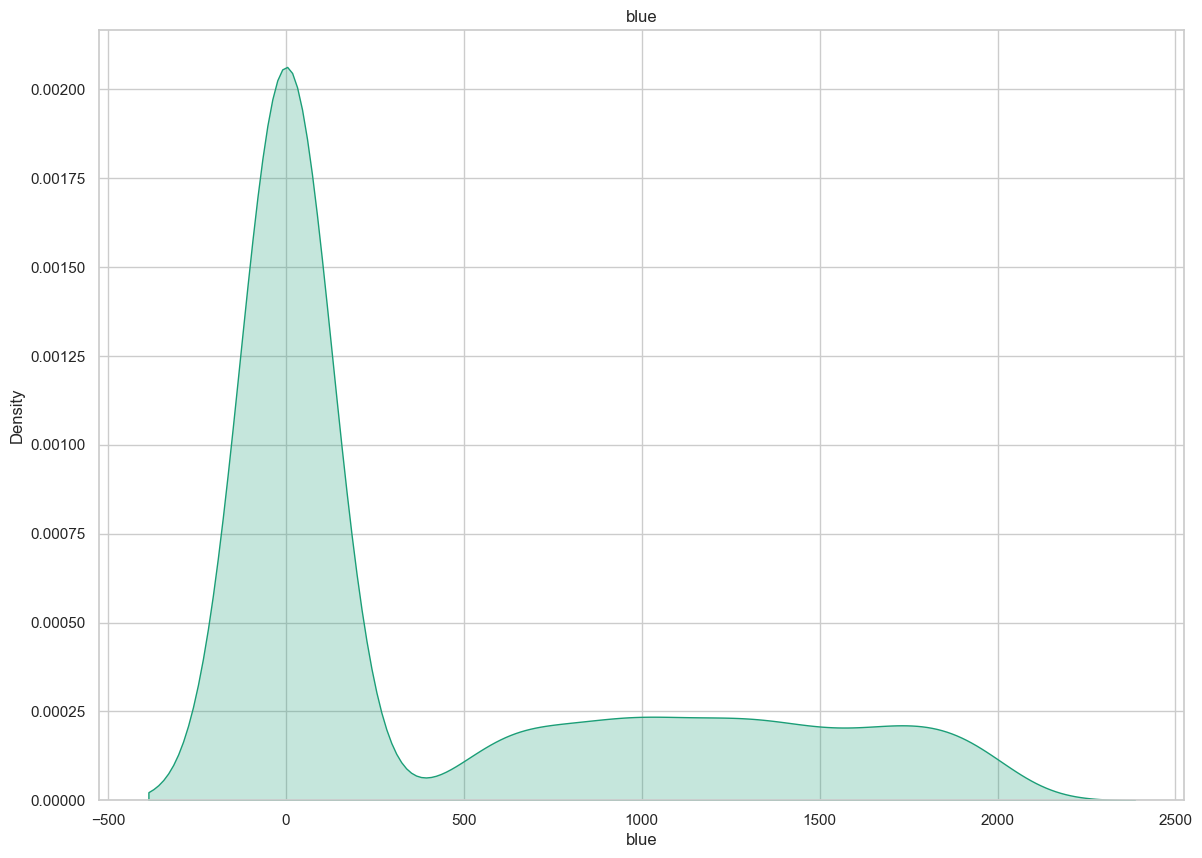

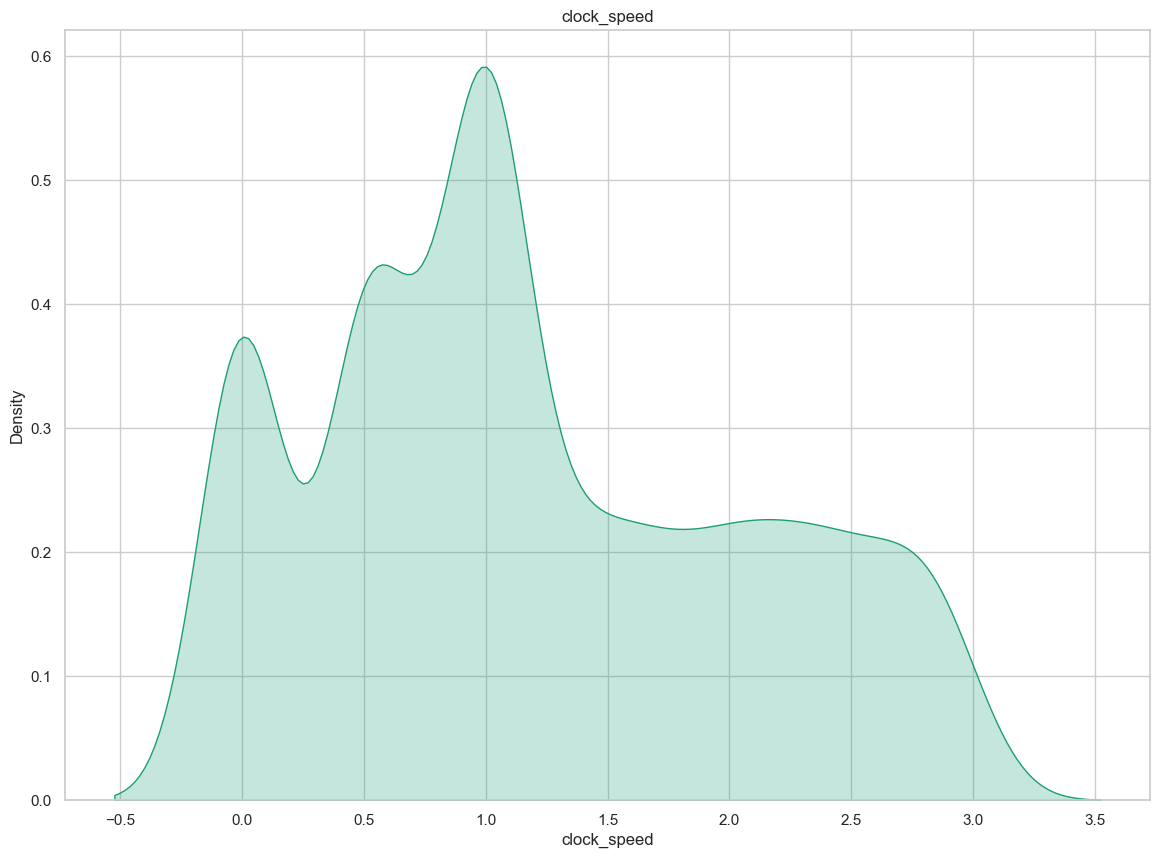

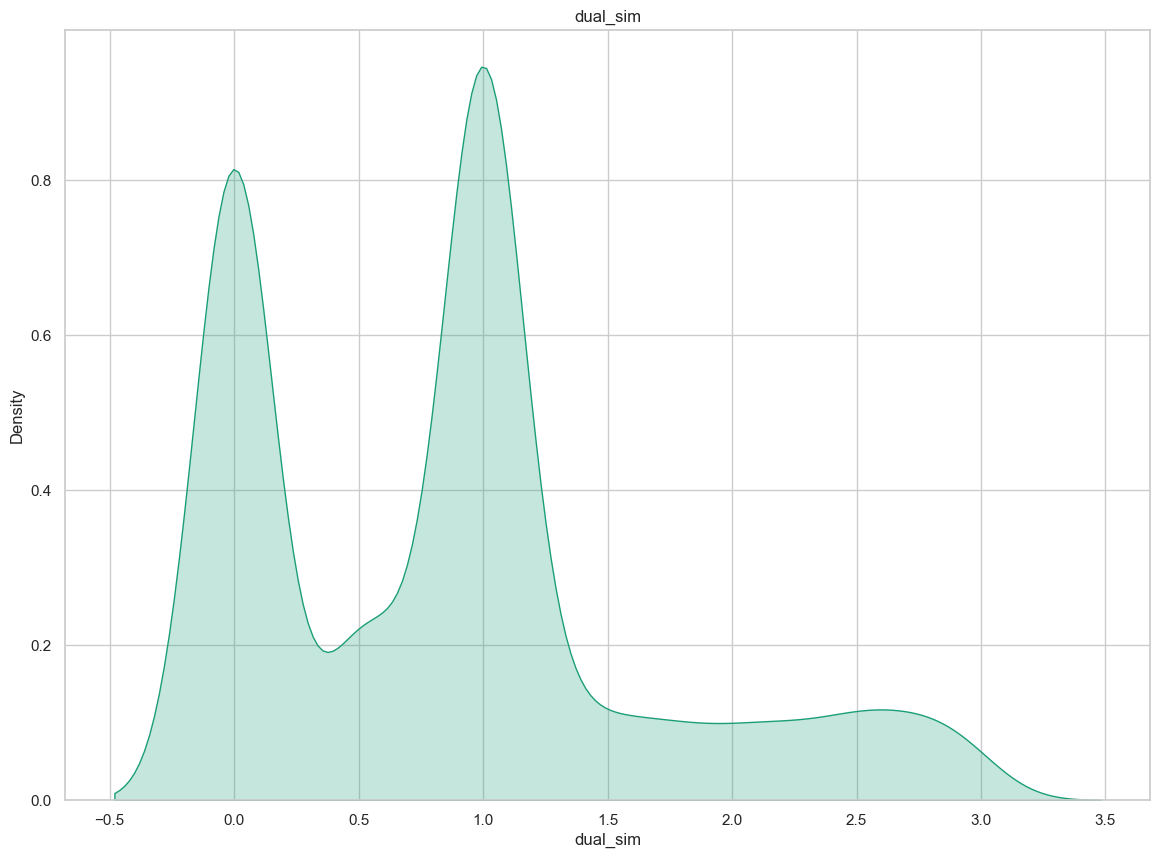

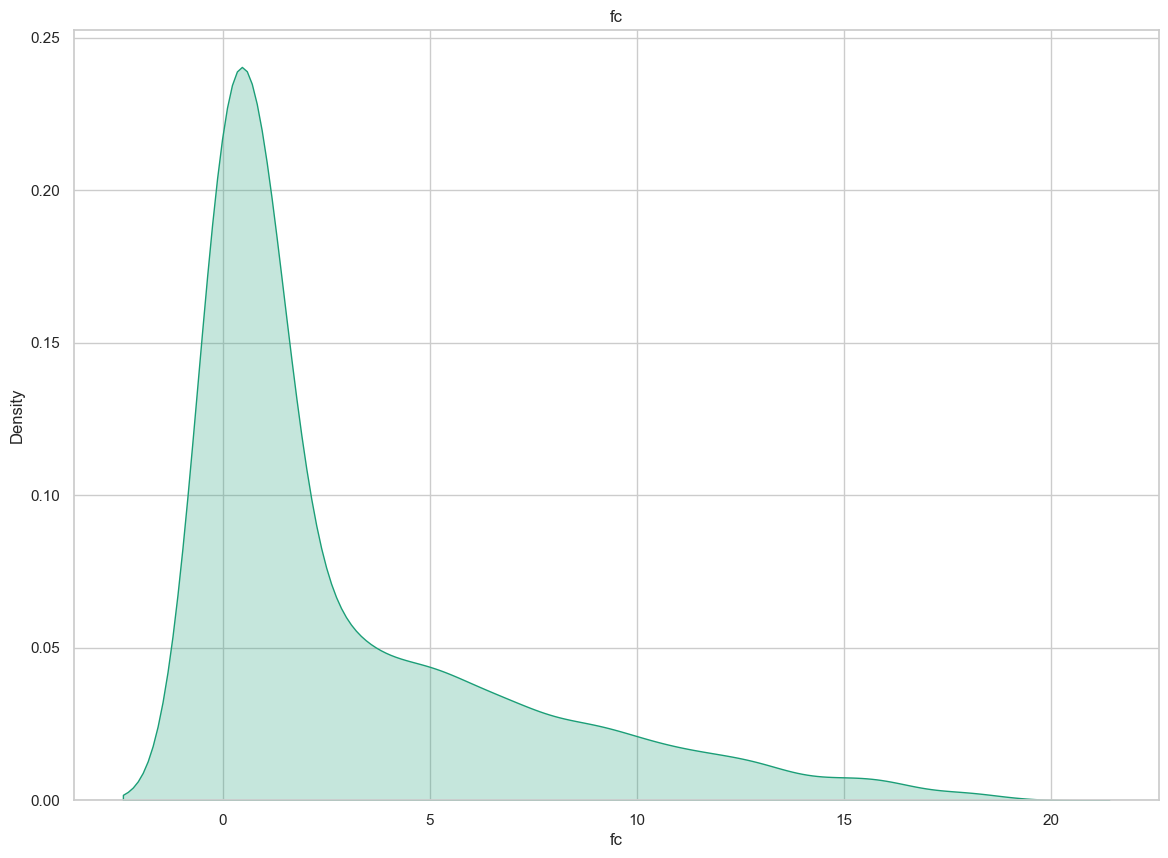

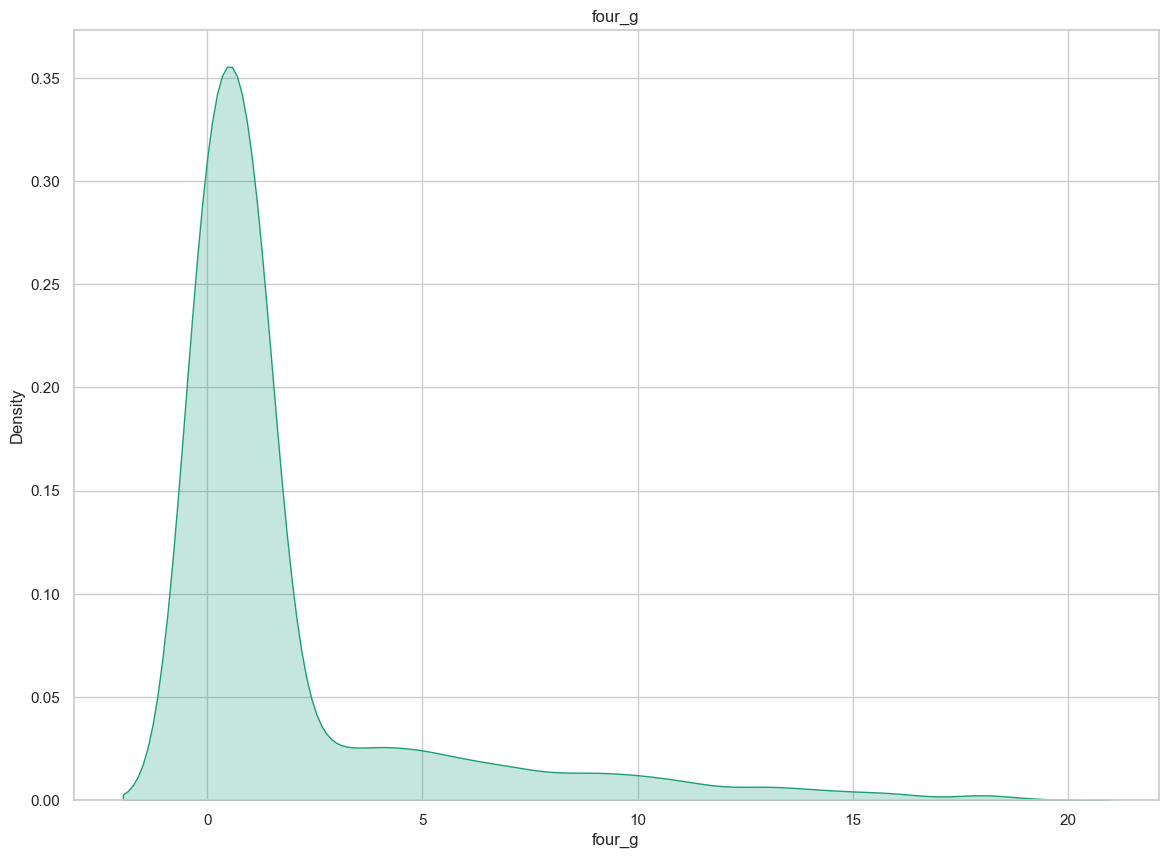

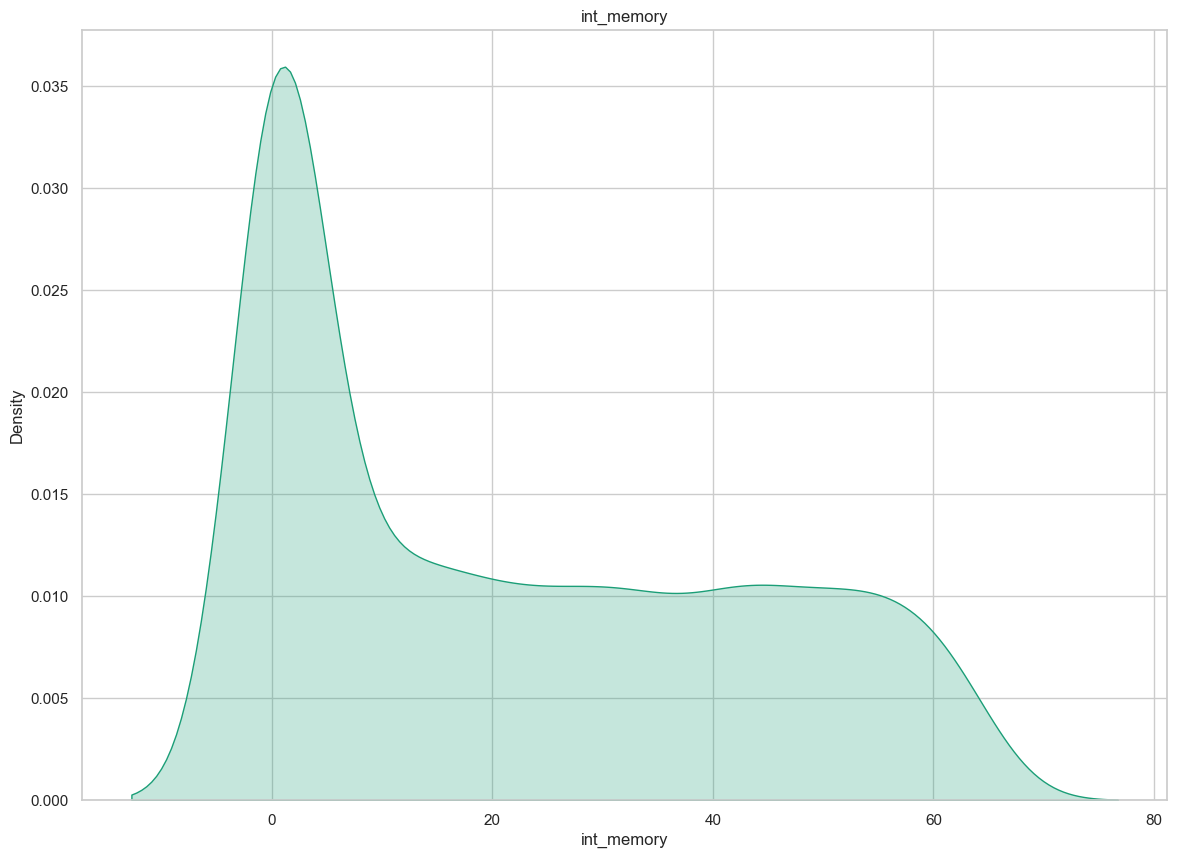

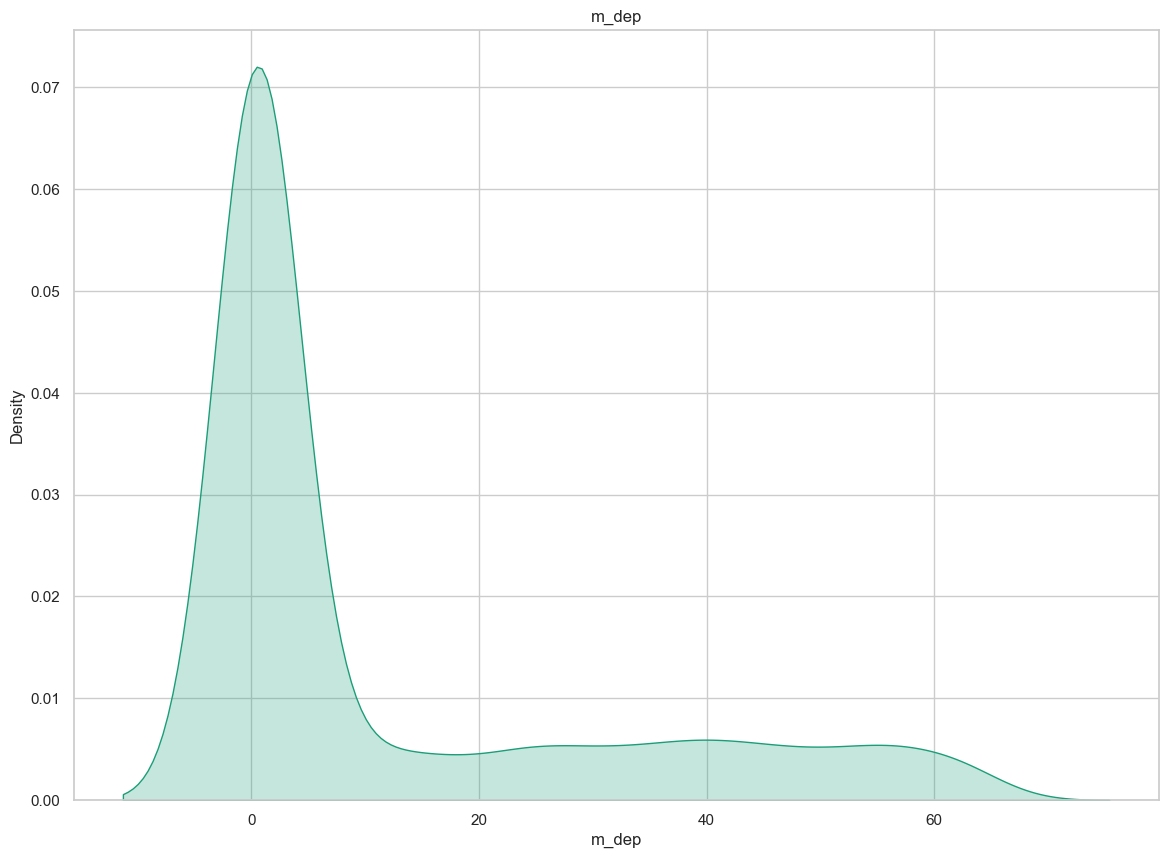

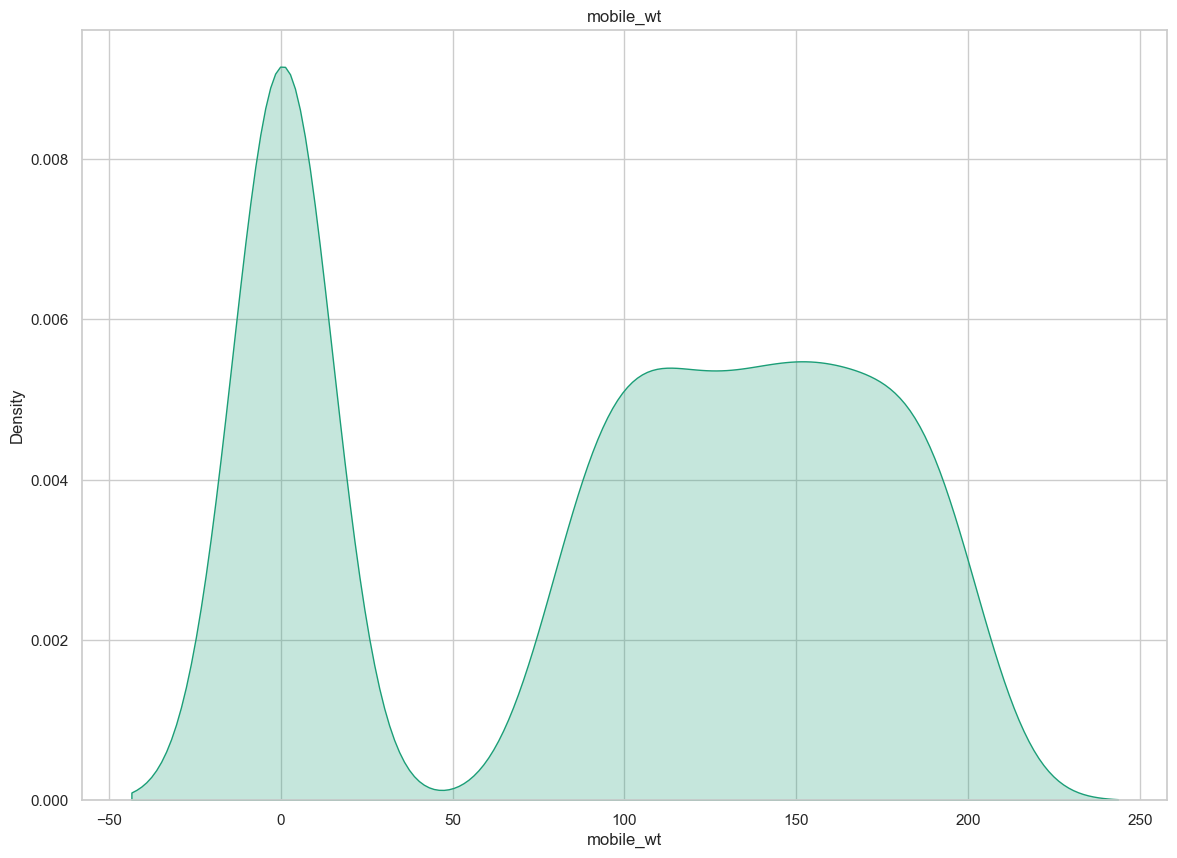

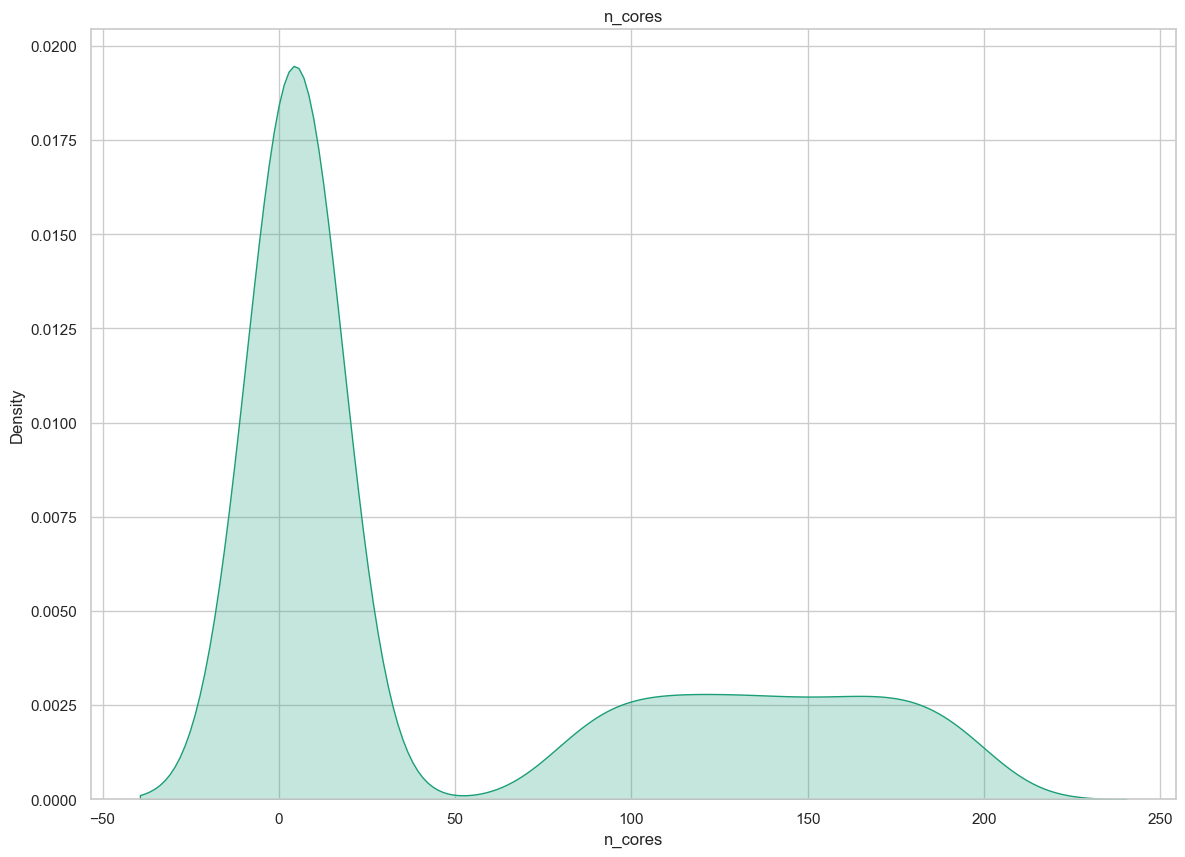

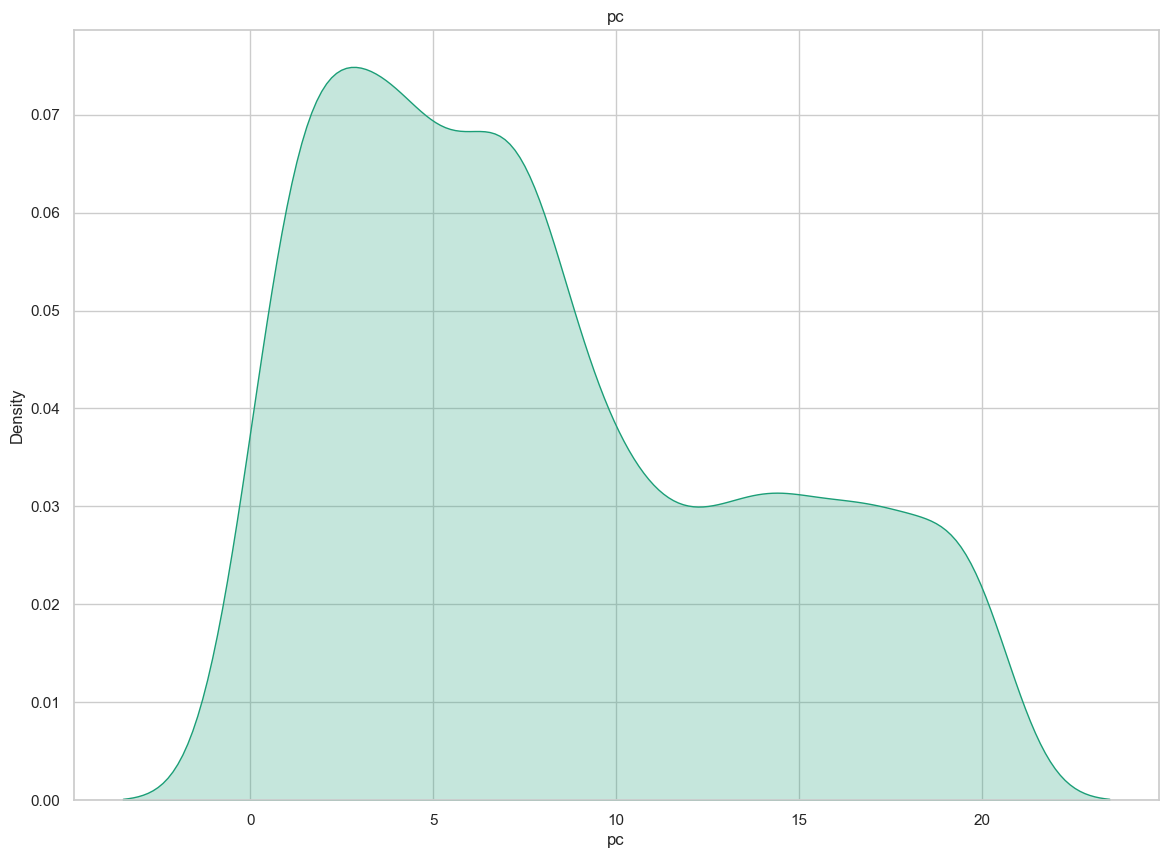

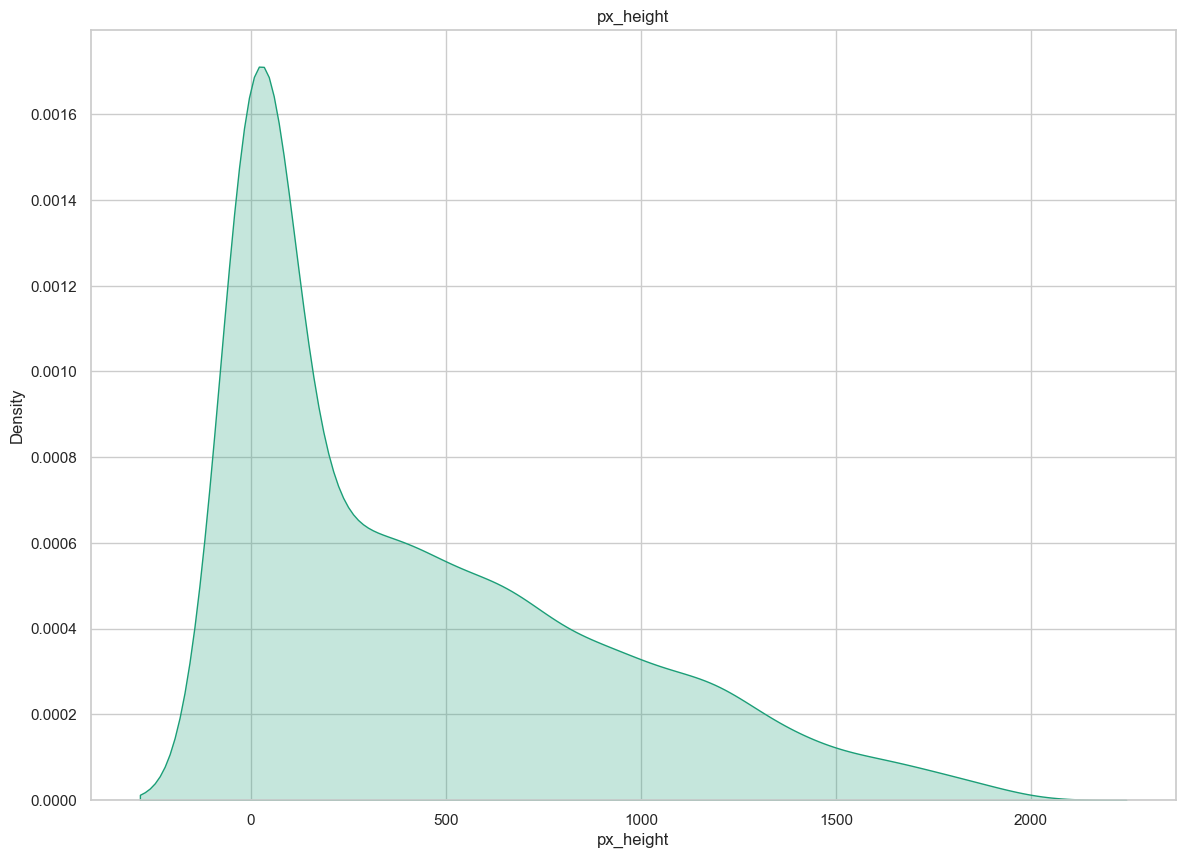

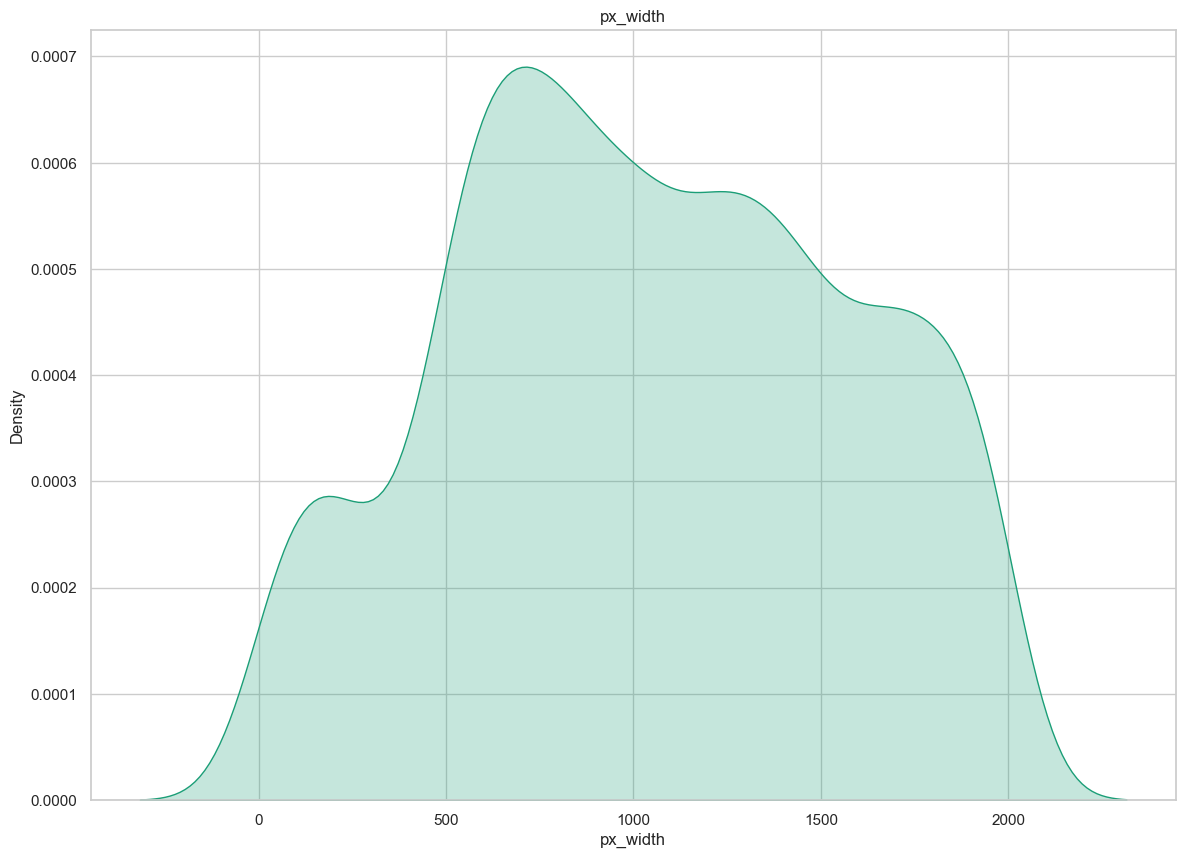

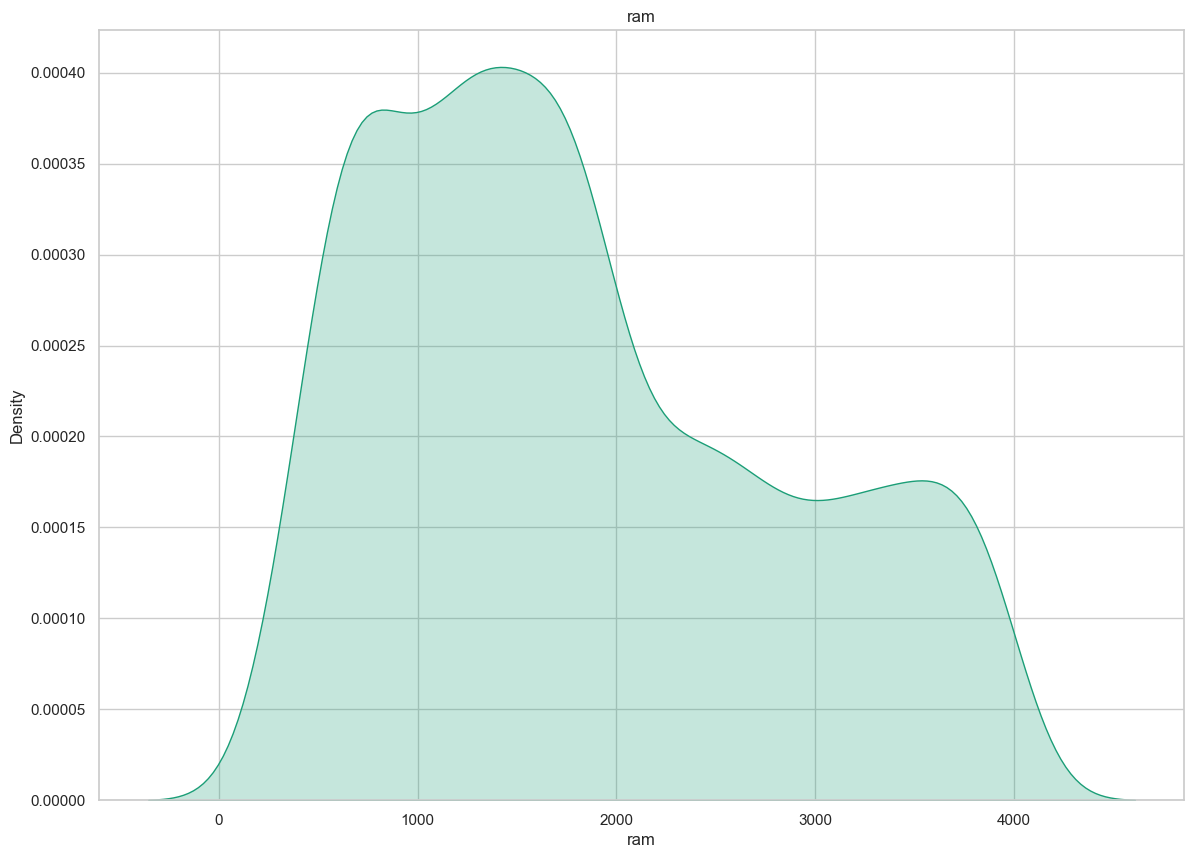

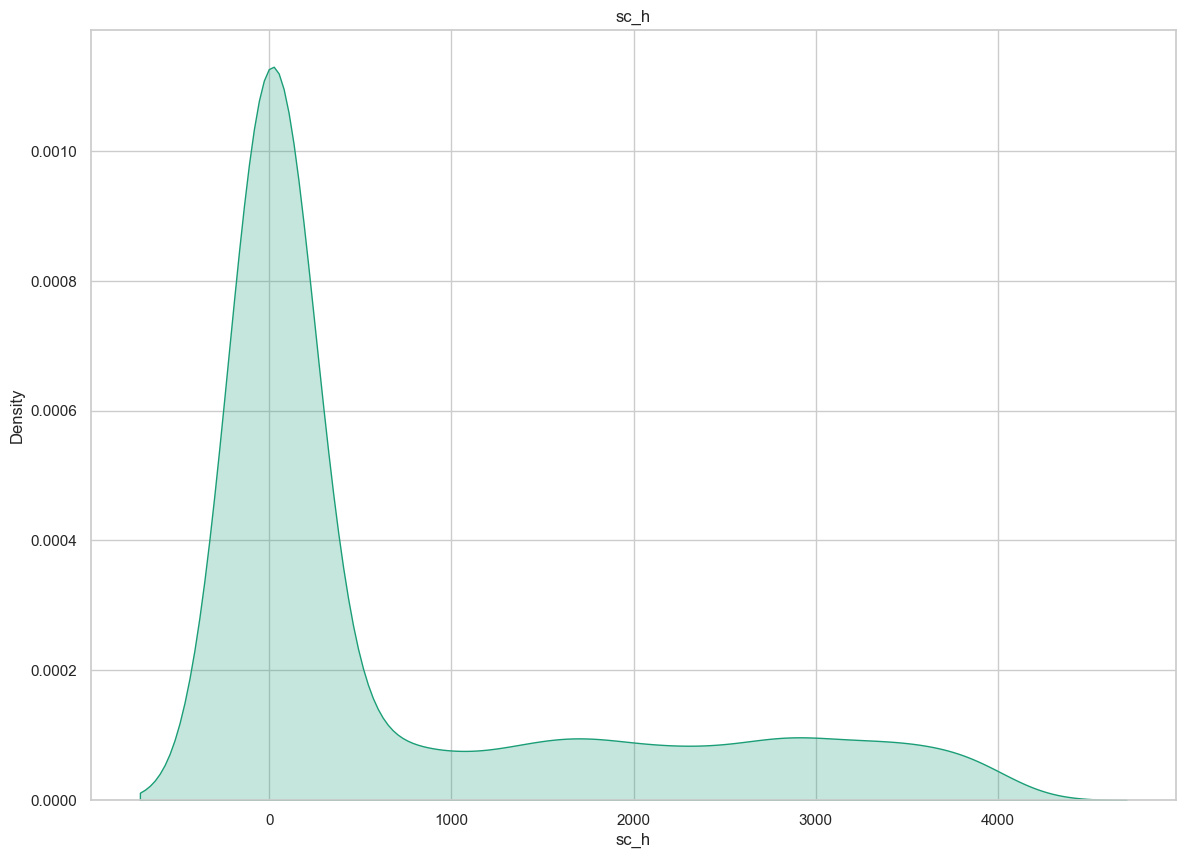

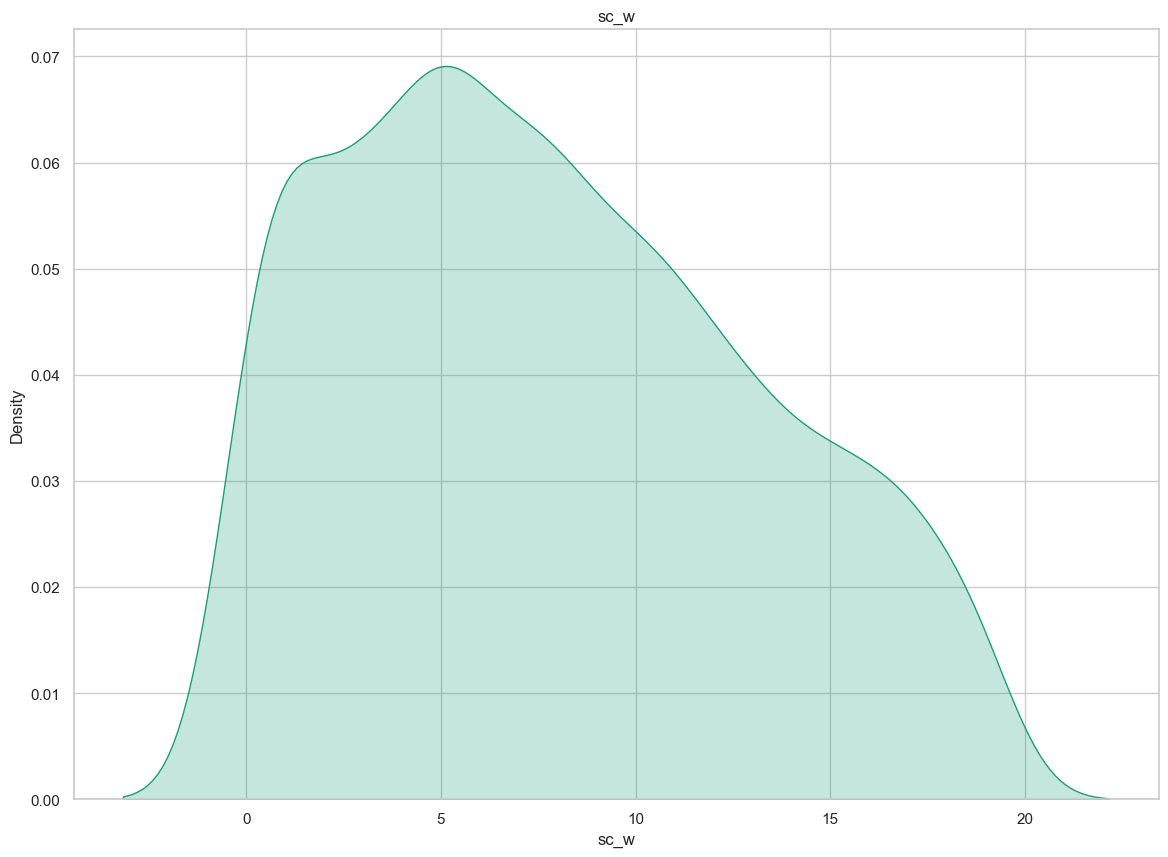

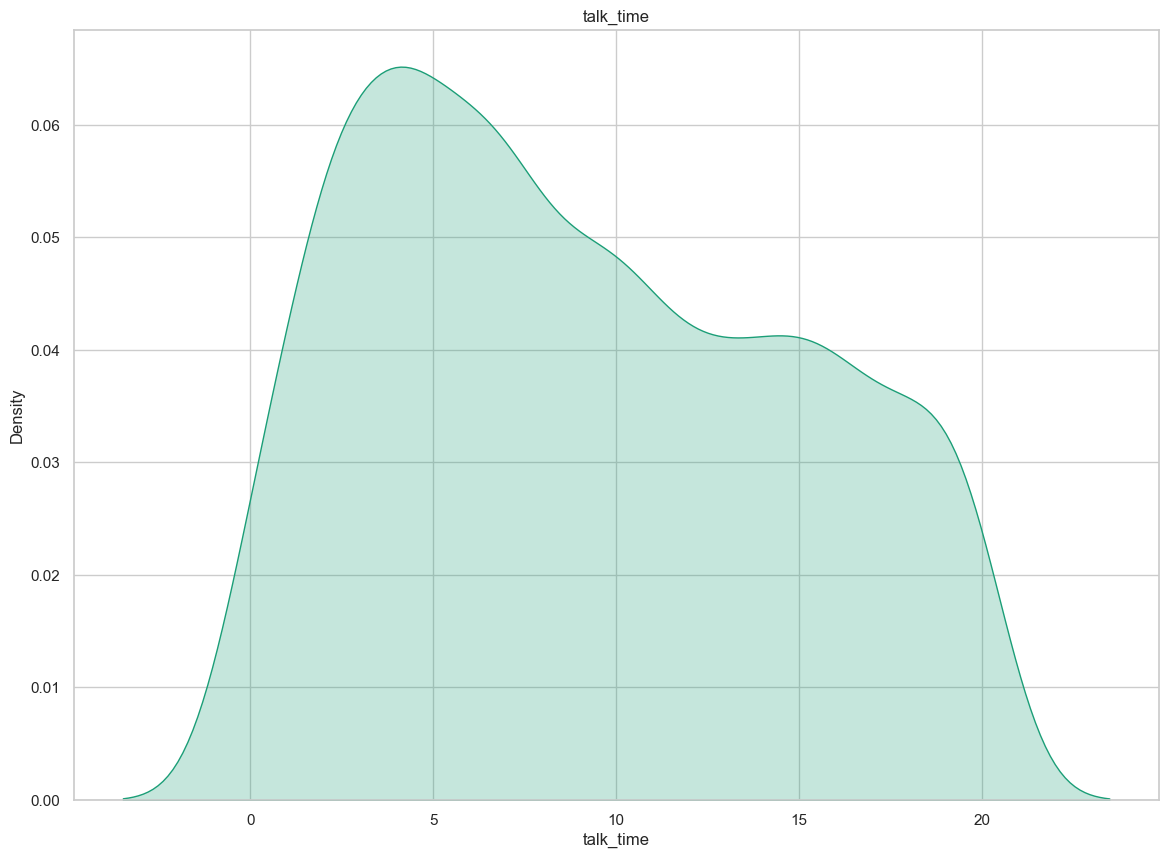

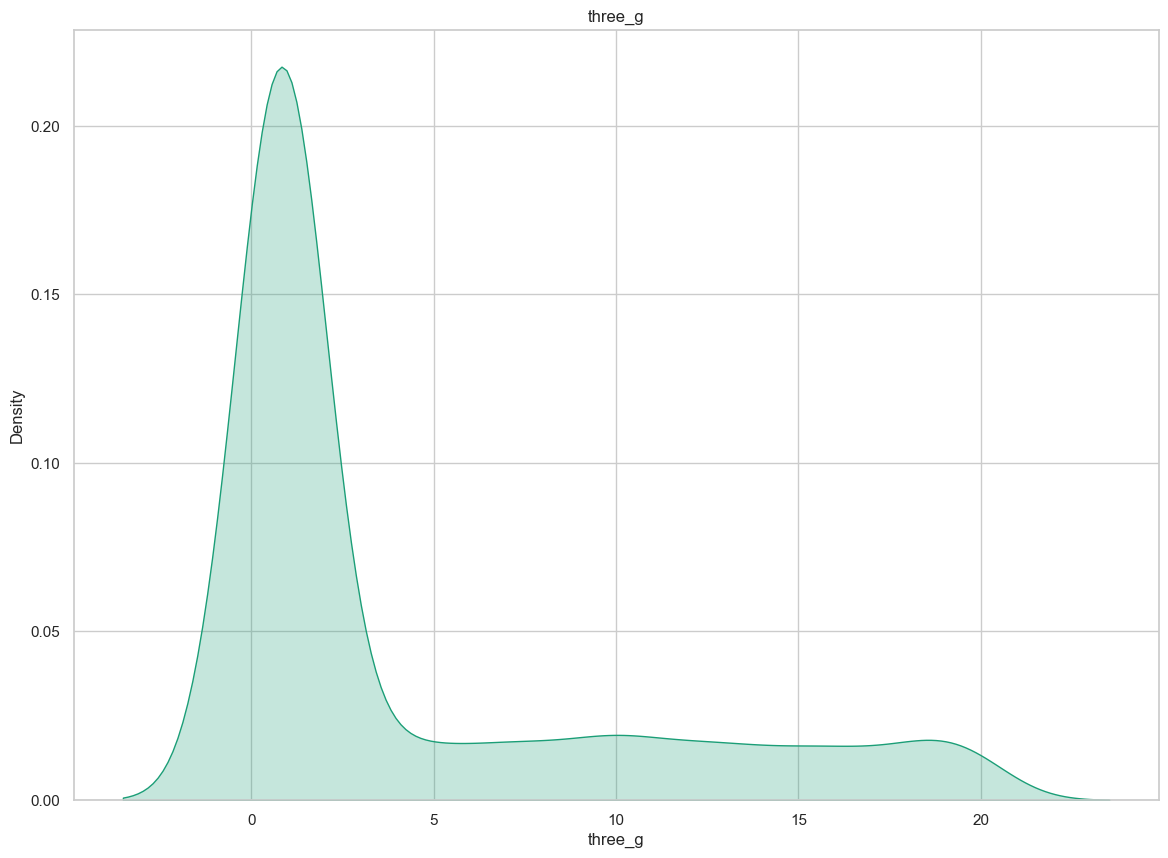

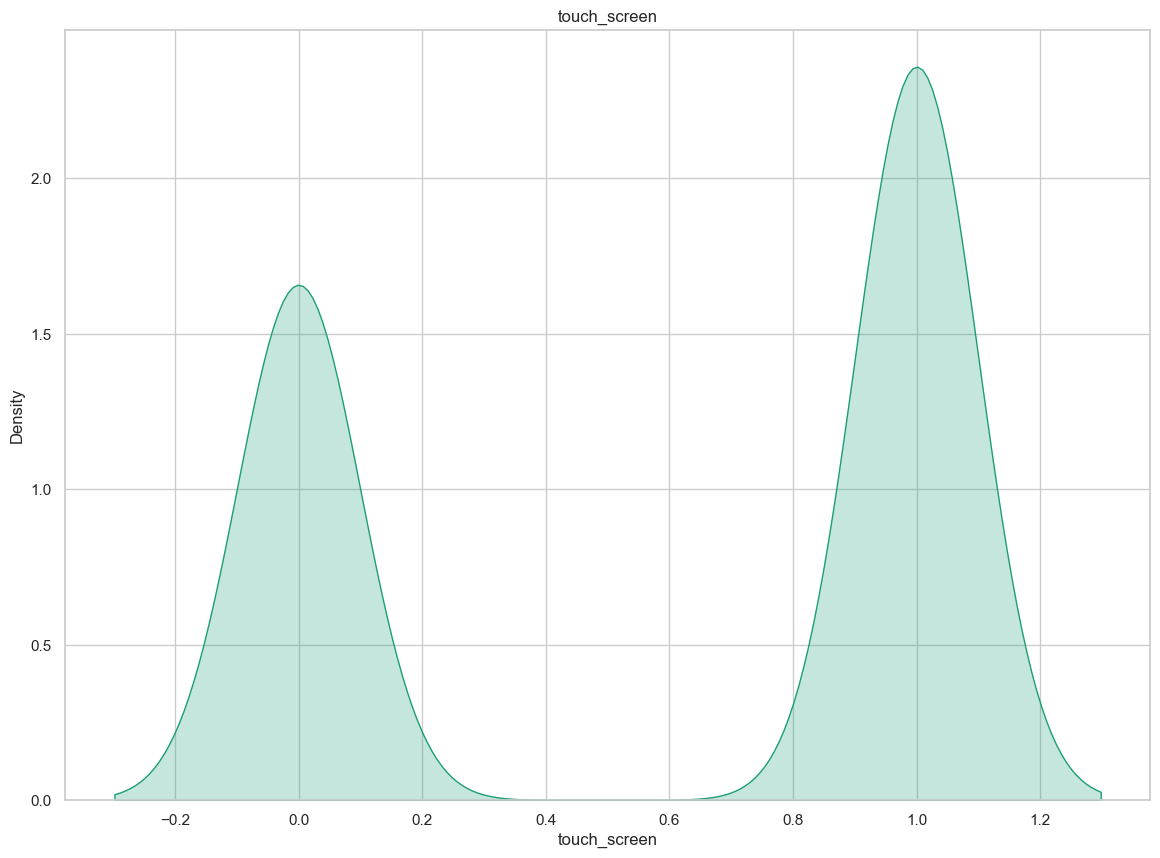

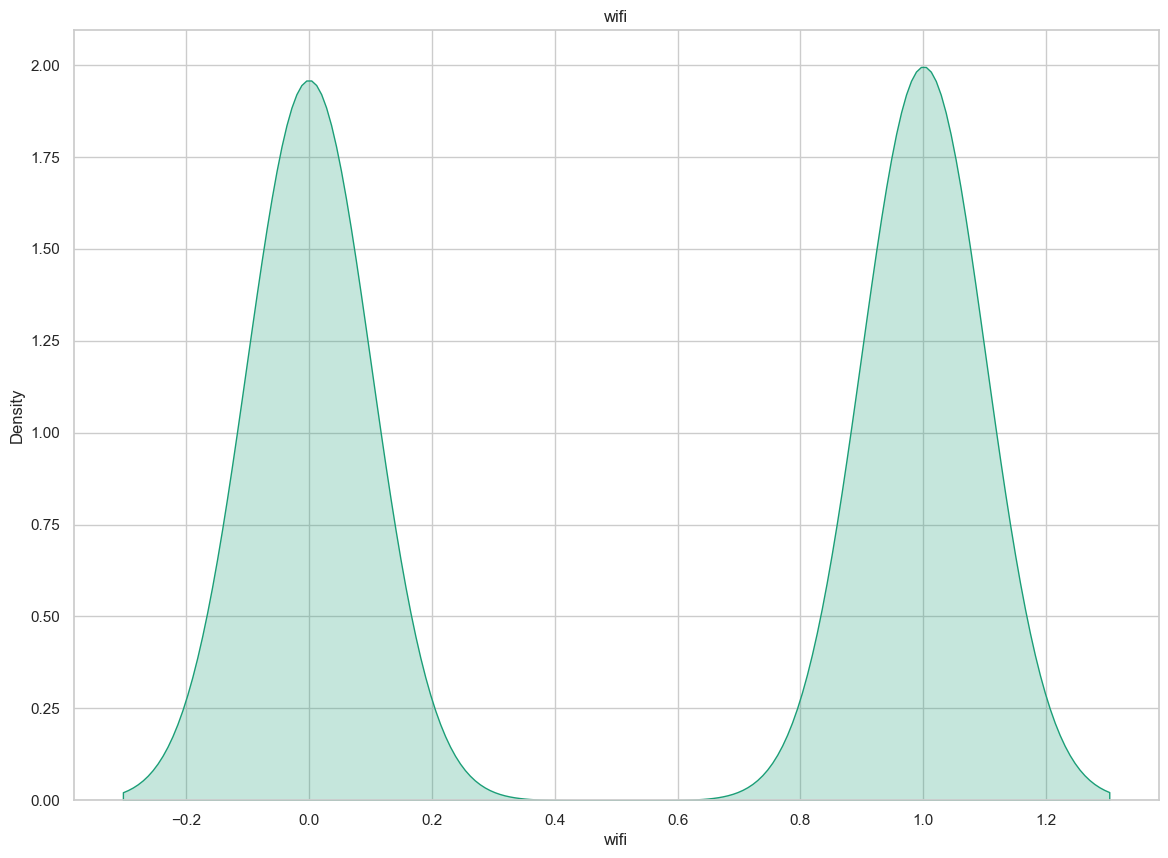

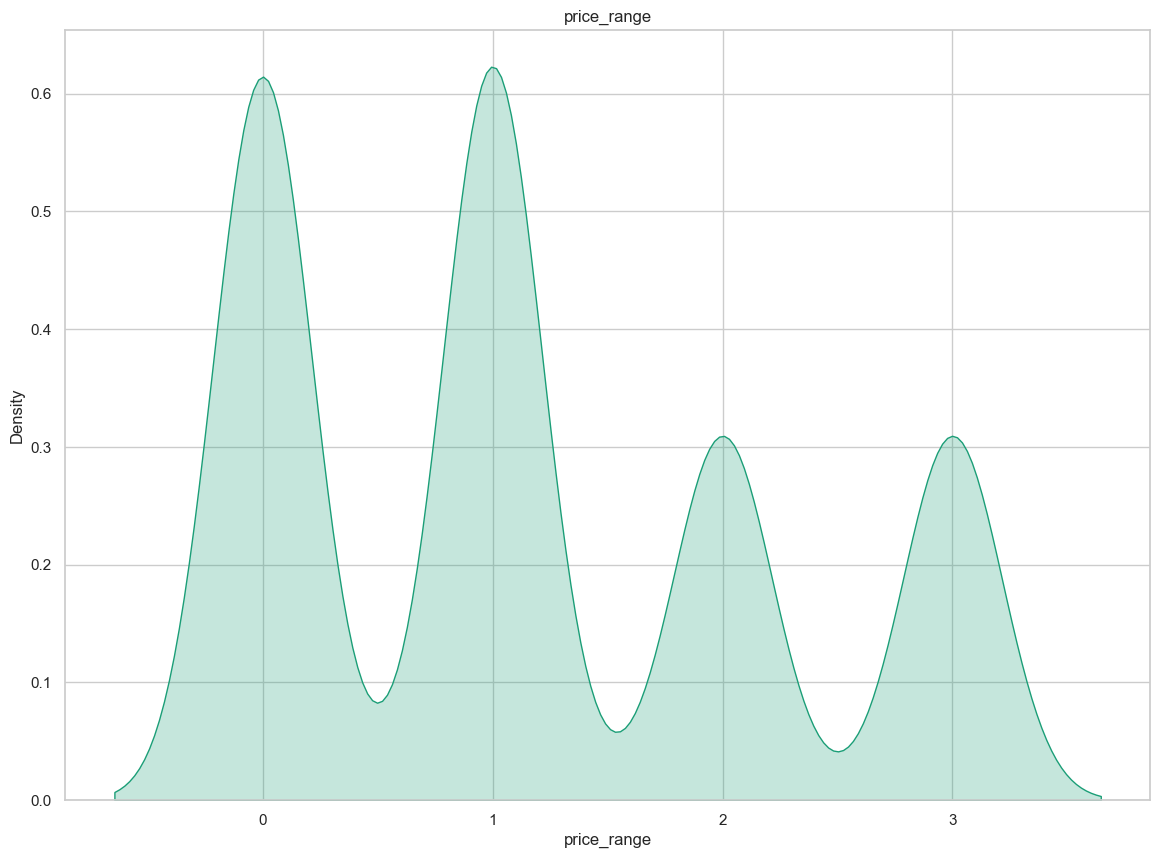

In [56]:
numeric_dens(df.columns)

In [57]:
# method for heatamp
def values_heatmap(corelations) :
    """
        Function that show corrlations with heatmap
        Args:
            corelations -> list of columns for heatmap
    """
    plt.figure(figsize= (16,10))
    sns.heatmap(corelations, annot= True)
    plt.title('Heatmap - Values Correlation')
    plt.show()


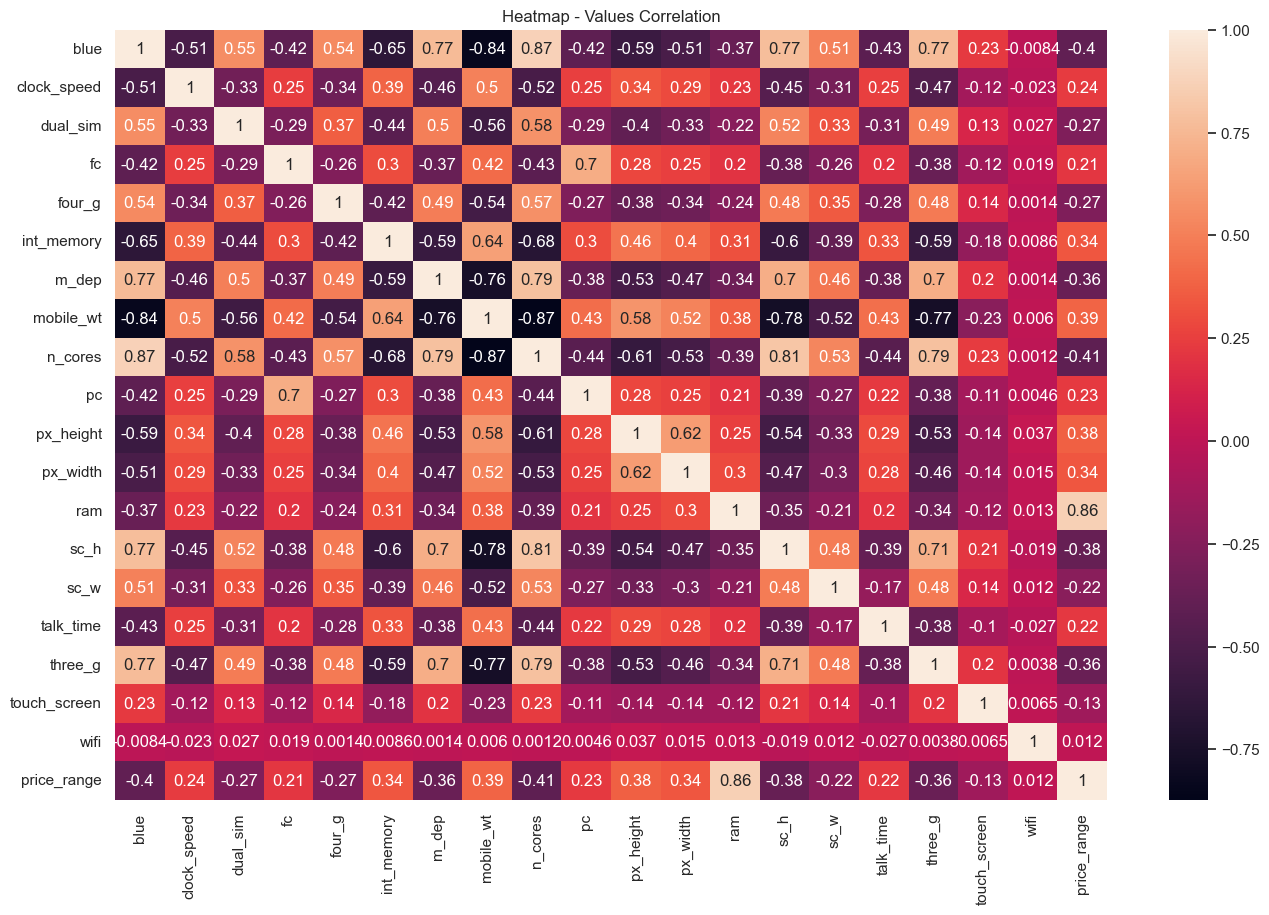

In [58]:
# init heatmap method
corr = df.corr(method= 'pearson')

values_heatmap(corr)

In [59]:
# check outlines with boxplots
def out_charts(columns) :
    """
        Function to check outliners with boxplots

        Args:
            columns -> name of column used for check
    """
    for col in columns :
        plt.figure(figsize= (14,6))
        sns.boxplot(df, x = col)
        plt.title(col)
        plt.show()

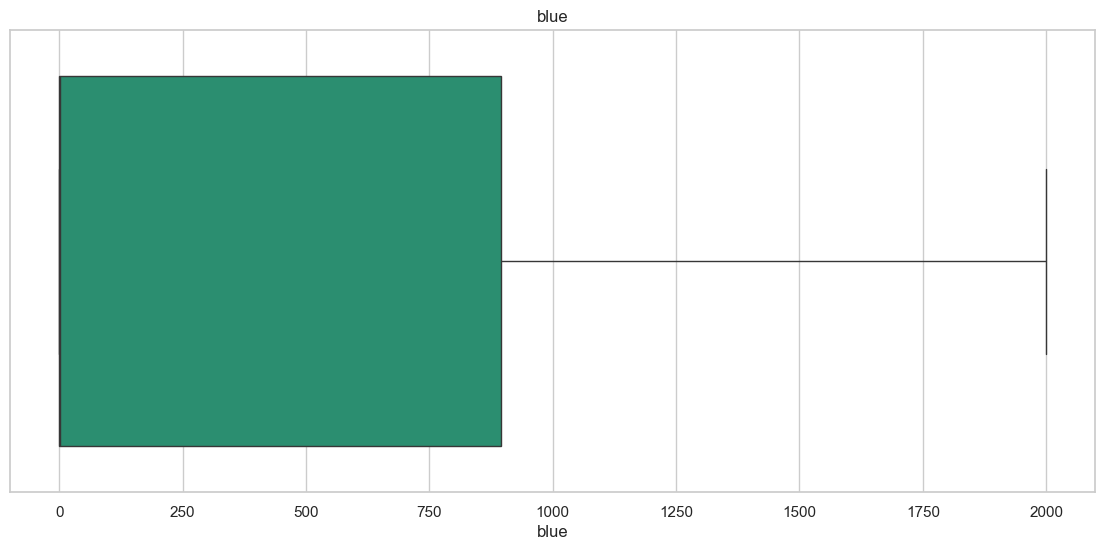

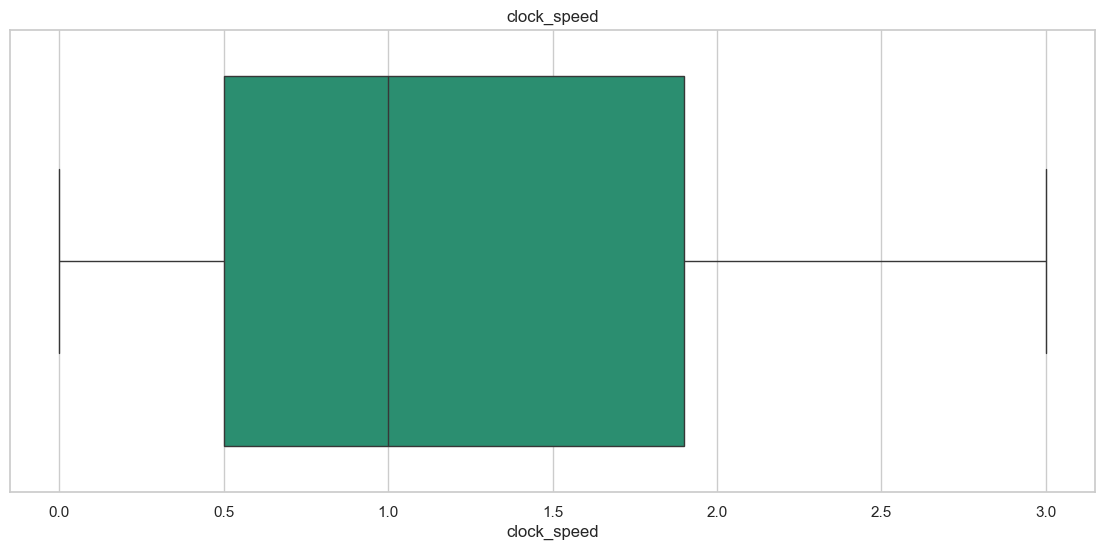

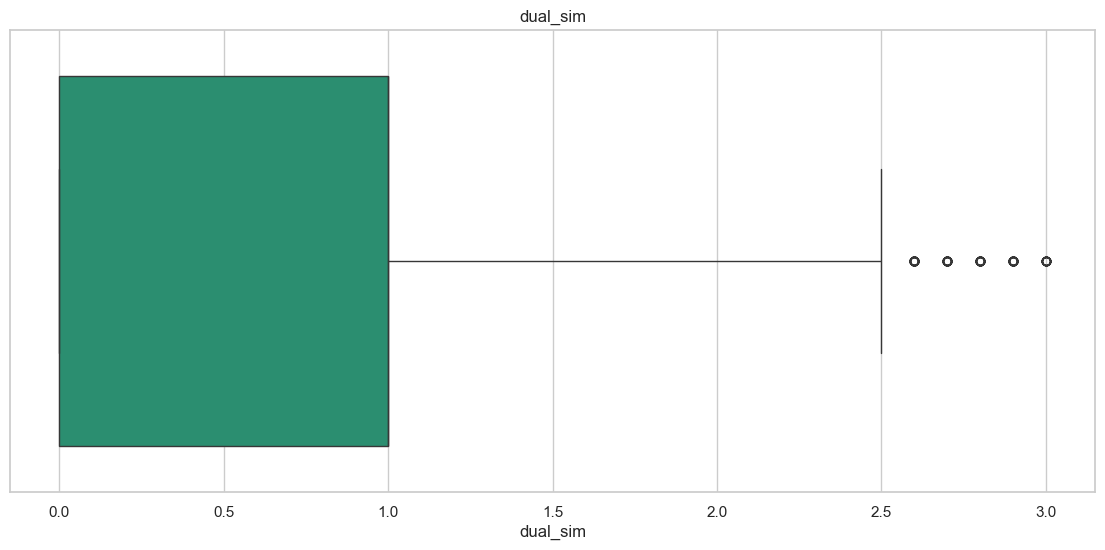

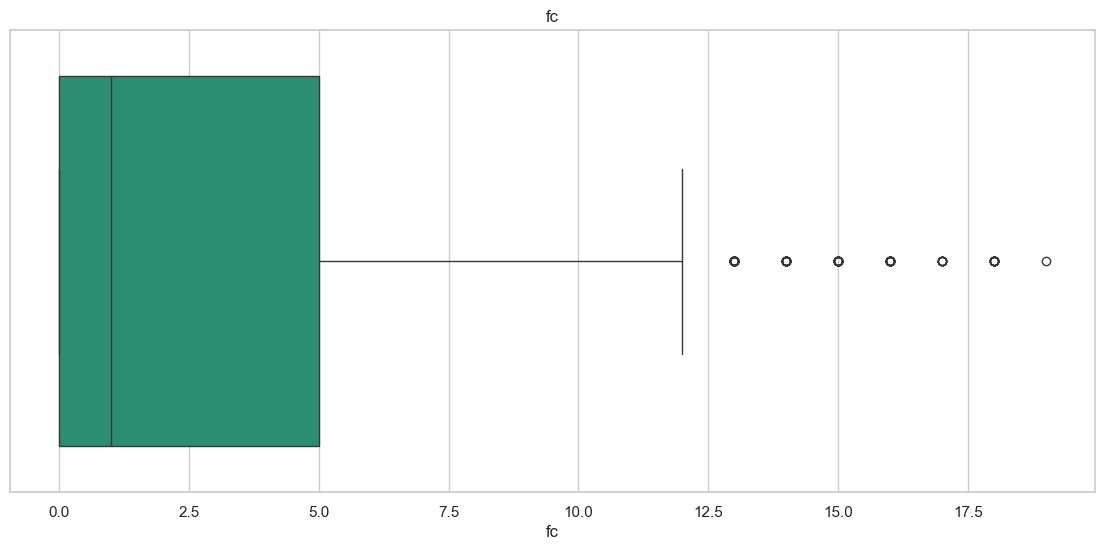

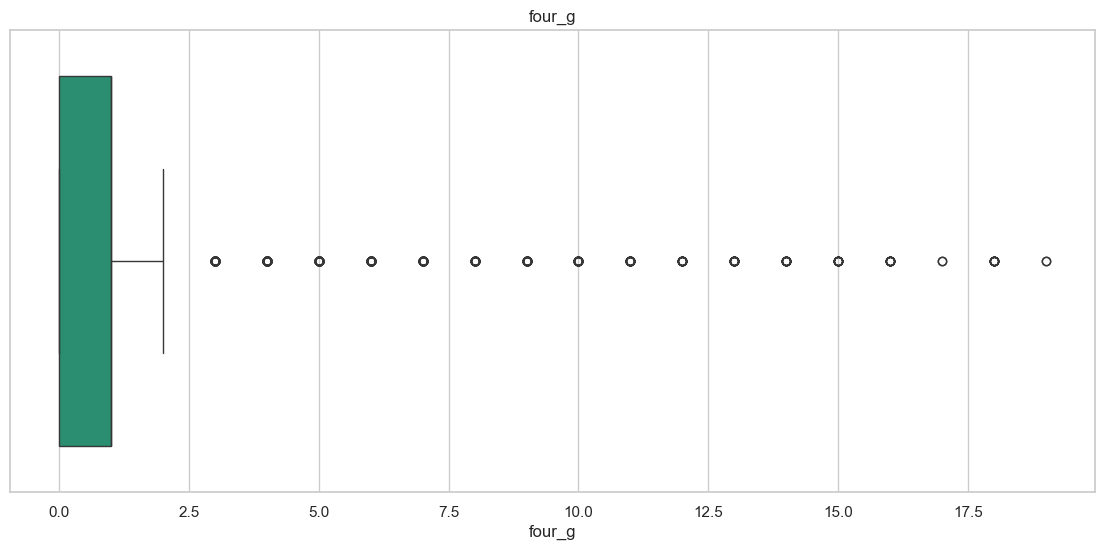

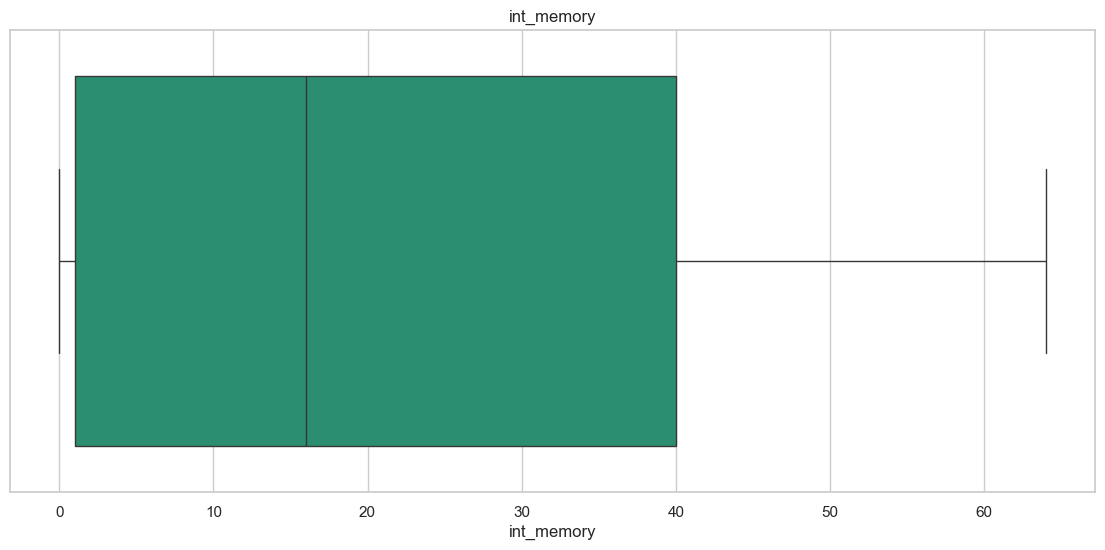

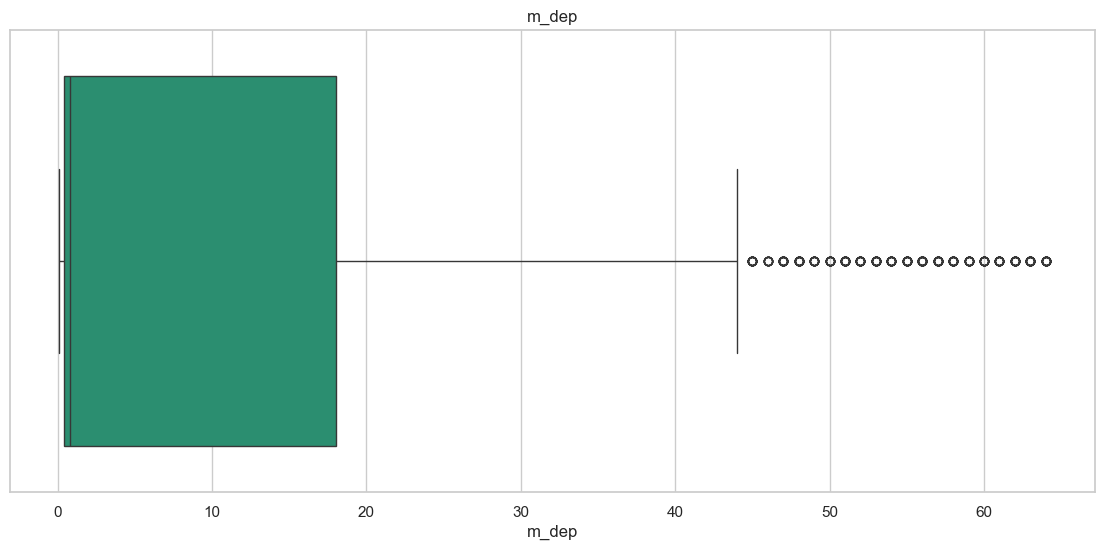

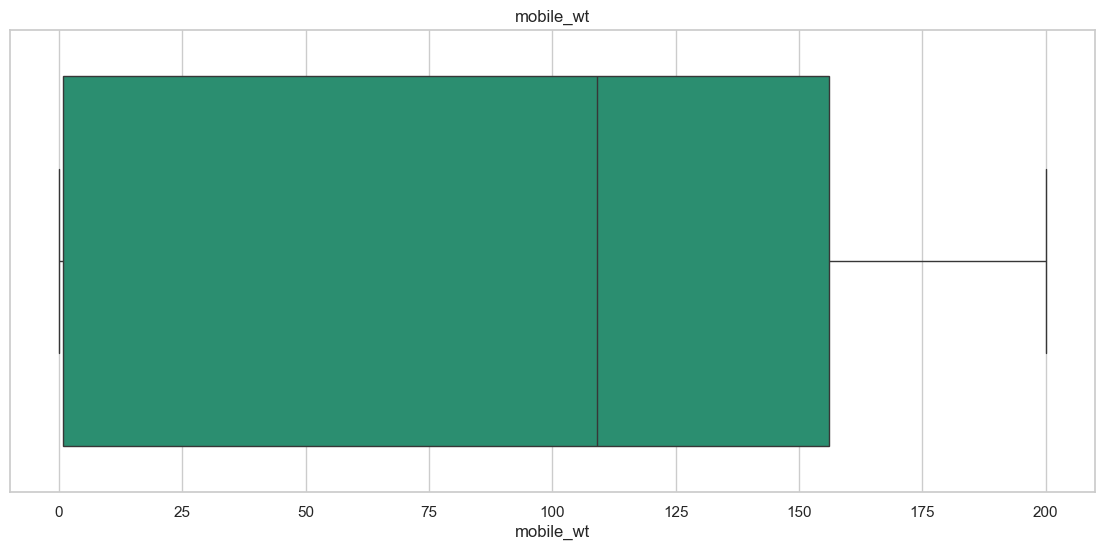

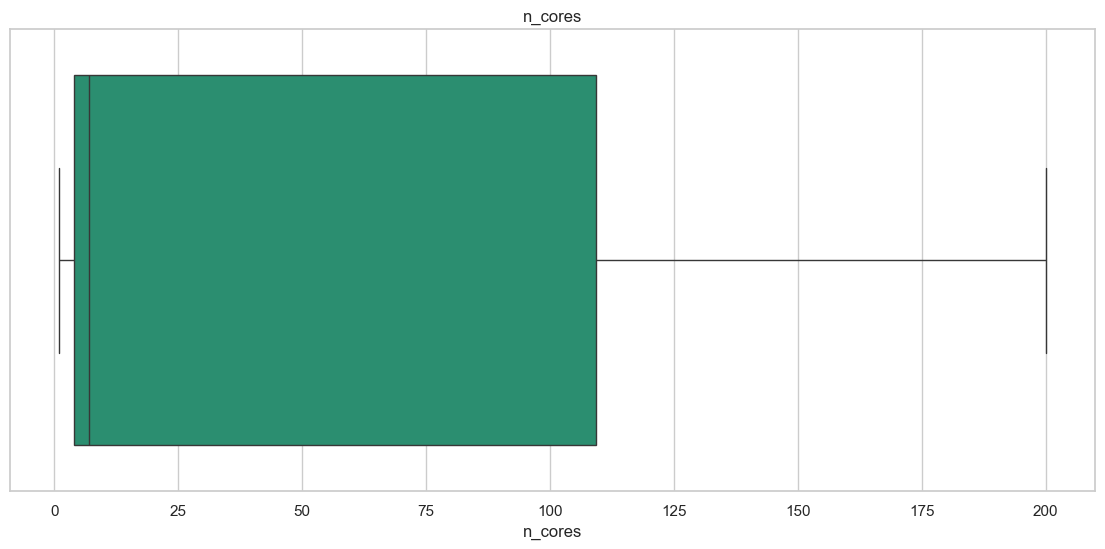

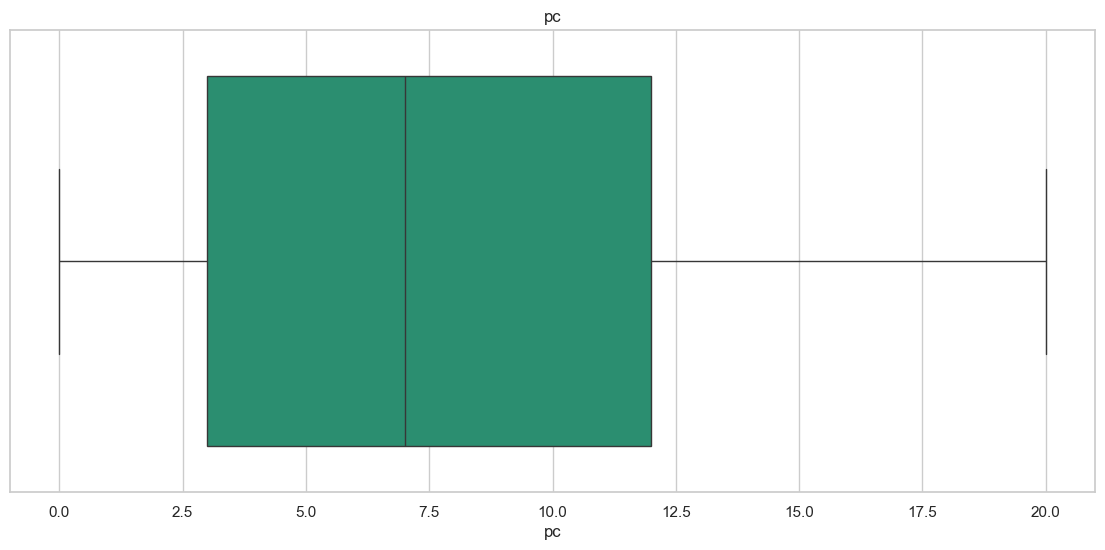

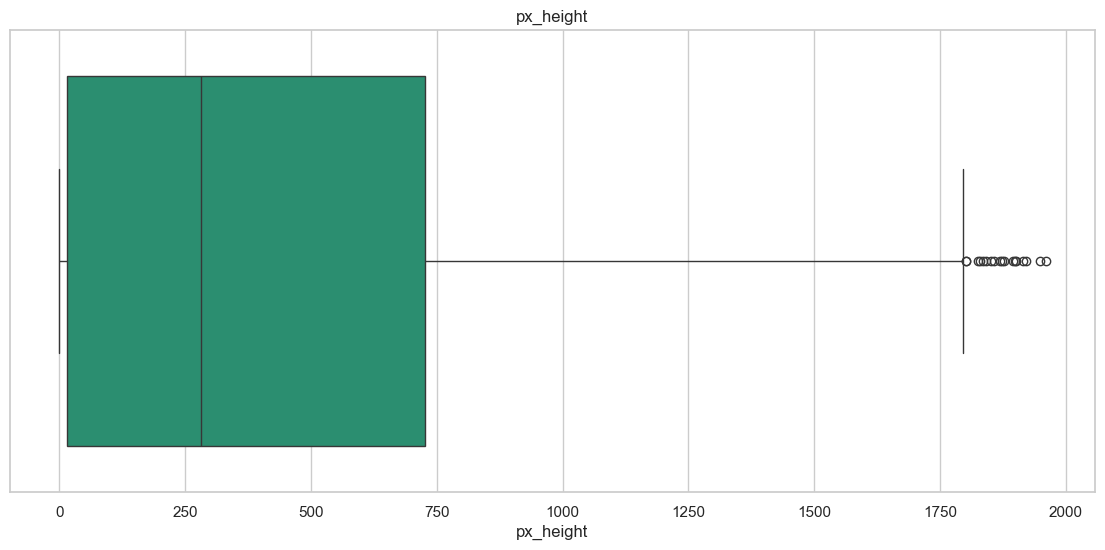

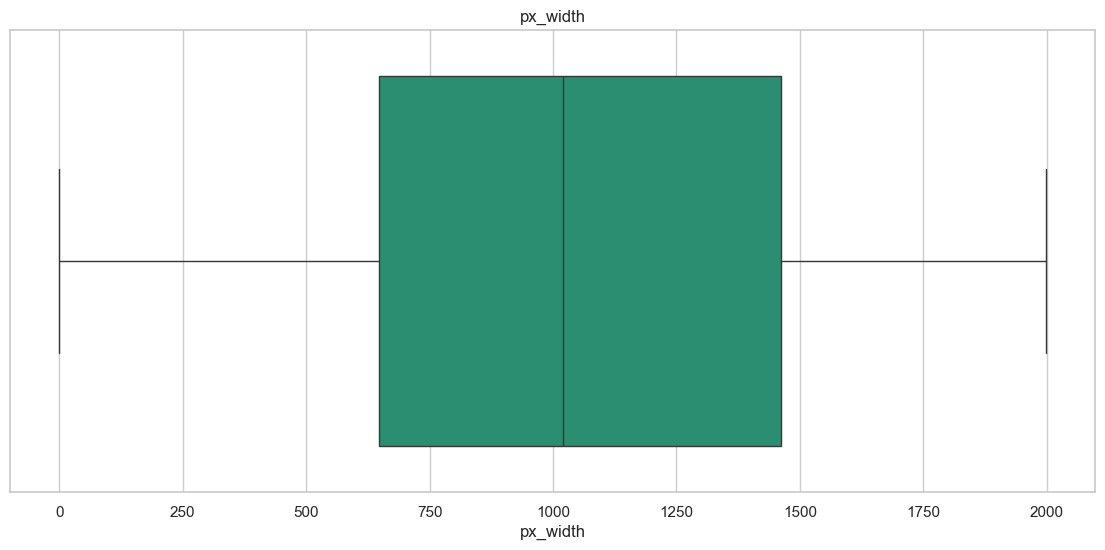

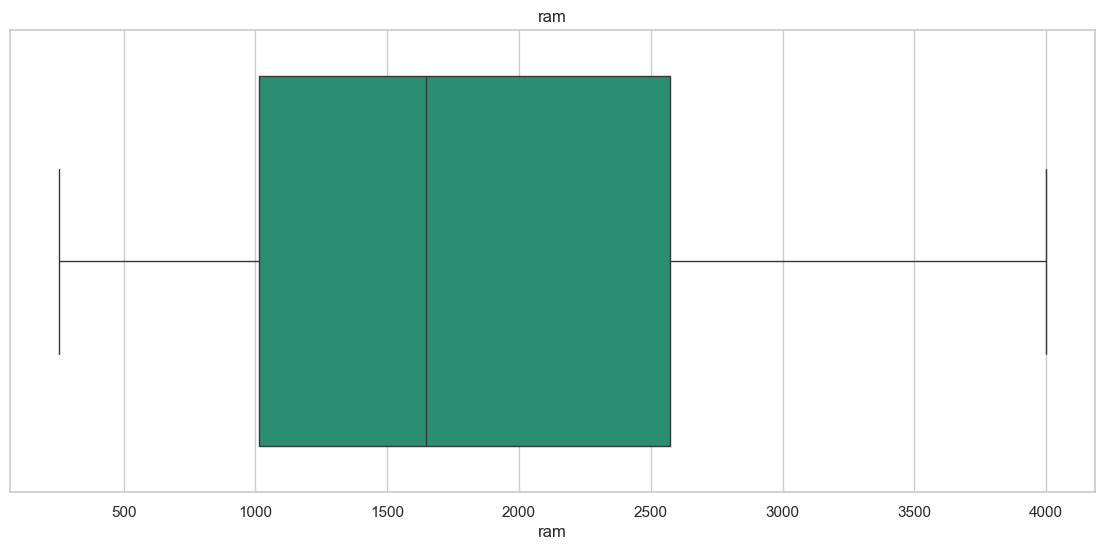

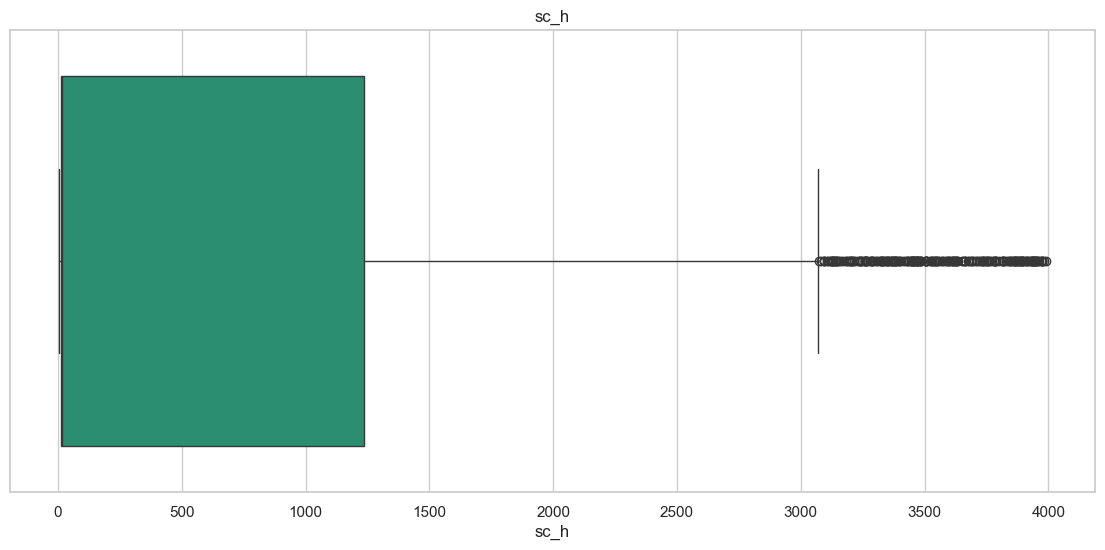

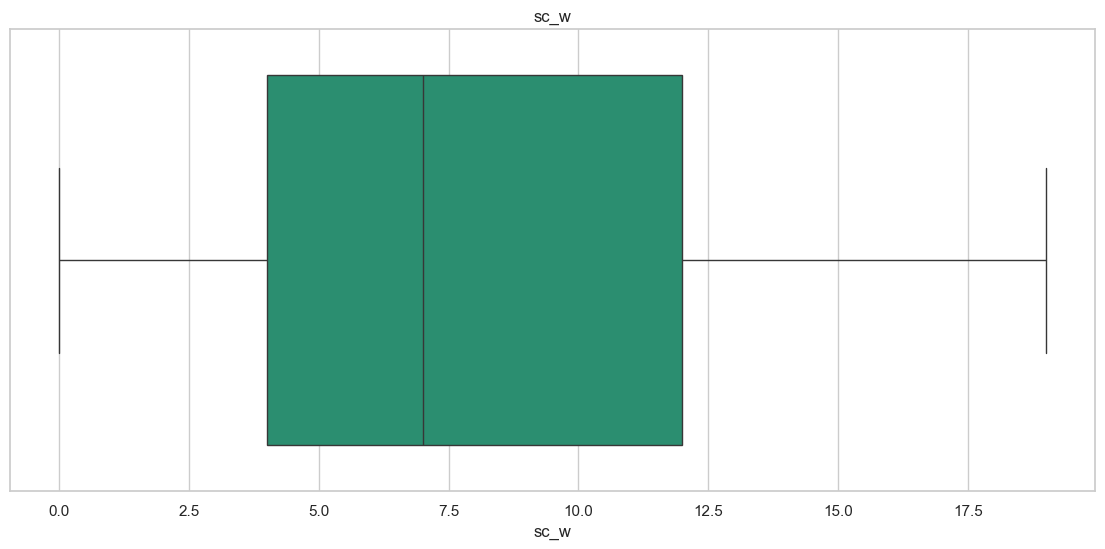

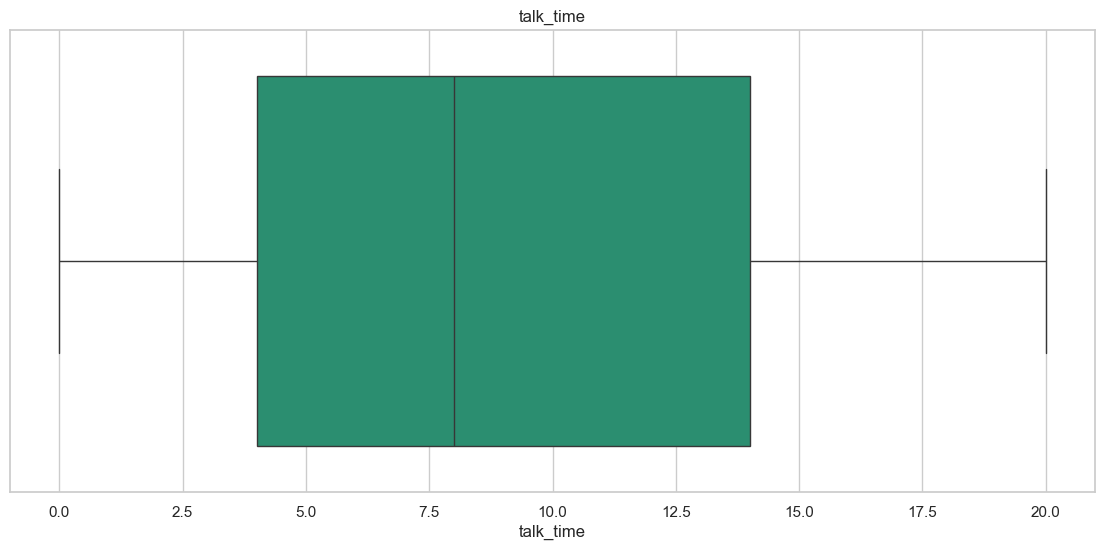

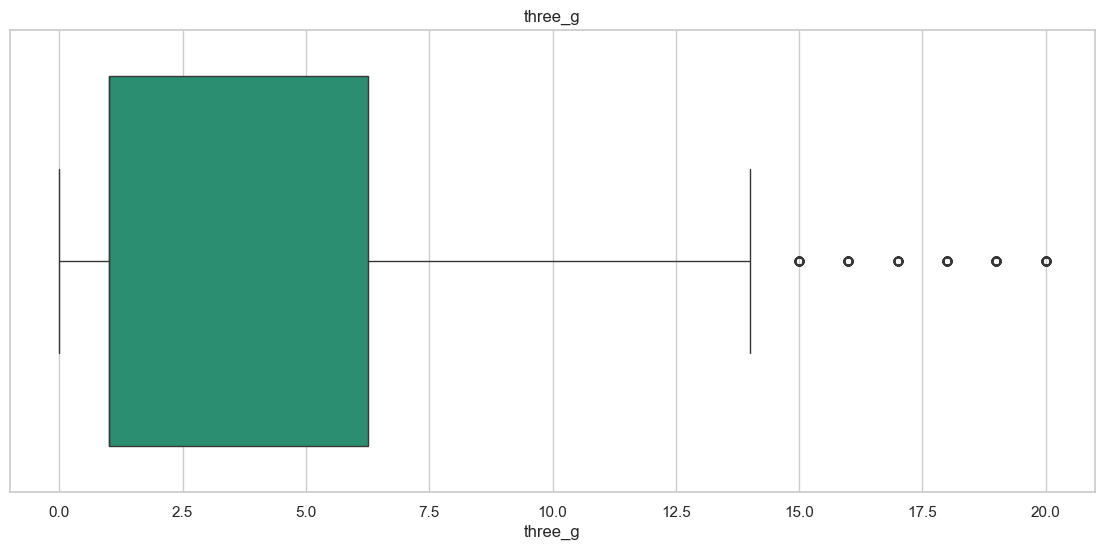

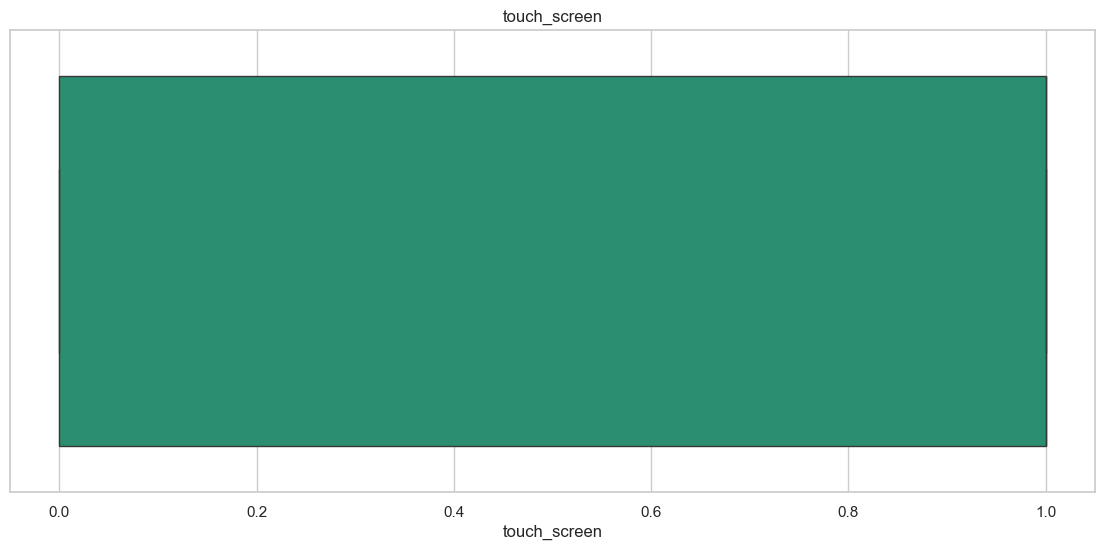

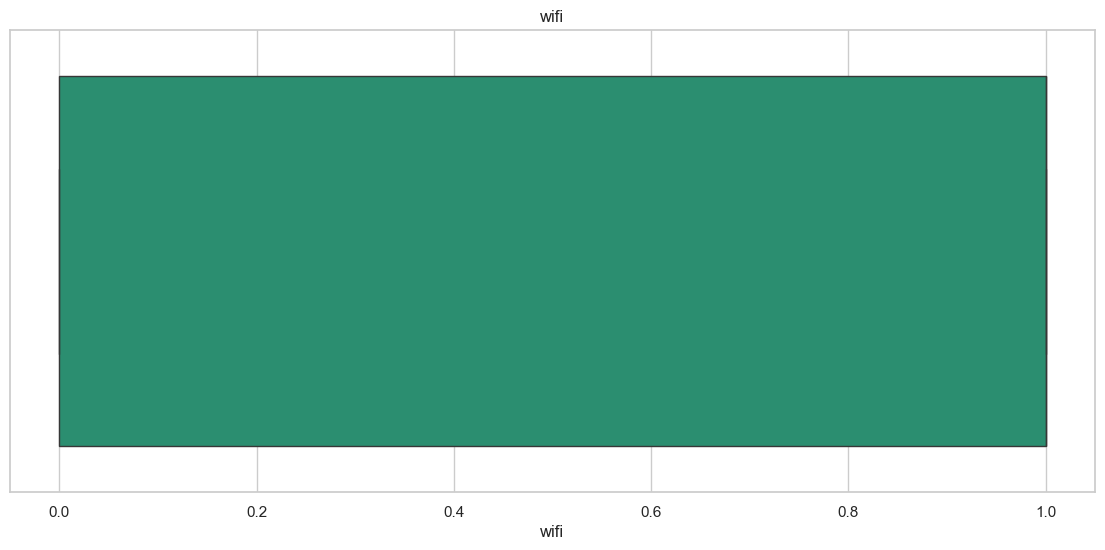

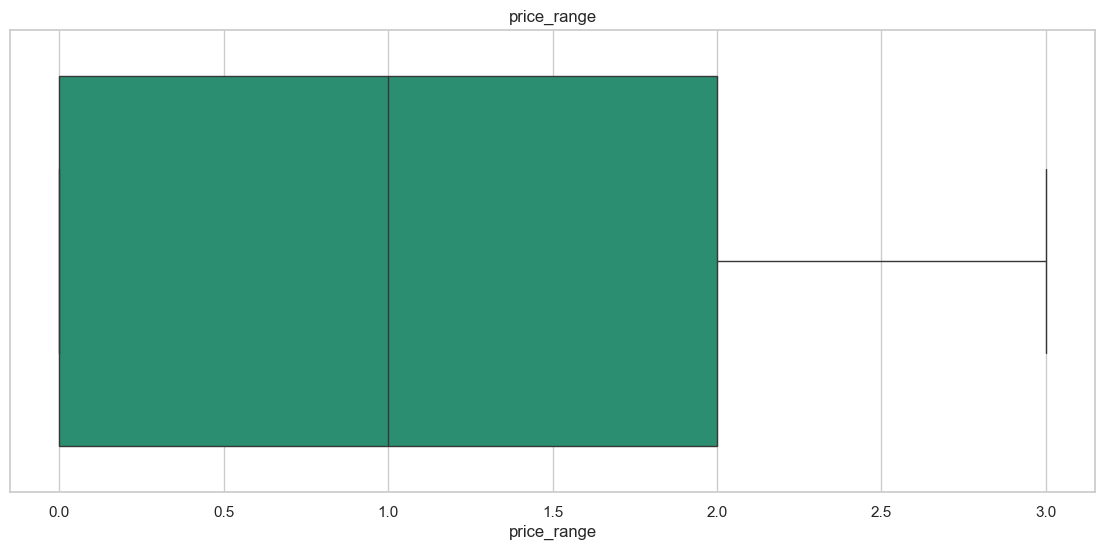

In [60]:
out_charts(df.columns)

## 4. Data Cleaning

In [61]:
df.head(10)

,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
battery_power,,,,,,,,,,,,,,,,,,,,
842,0,2.2,0.0,1,0,7,0.6,188.0,2,2,20,756,2549,9,7,19,0,0,1,1
1021,1,0.5,1.0,0,1,53,0.7,136.0,3,6,905,1988,2631,17,3,7,1,1,0,2
563,1,0.5,1.0,2,1,41,0.9,145.0,5,6,1263,1716,2603,11,2,9,1,1,0,2
615,1,2.5,0.0,0,0,10,0.8,131.0,6,9,1216,1786,2769,16,8,11,1,0,0,2
1821,1,1.2,0.0,13,1,44,0.6,141.0,2,14,1208,1212,1411,8,2,15,1,1,0,1
1859,0,0.5,1.0,3,0,22,0.7,164.0,1,7,1004,1654,1067,17,1,10,1,0,0,1
1821,0,1.7,0.0,4,1,10,0.8,139.0,8,10,381,1018,3220,13,8,18,1,0,1,3
1954,0,0.5,1.0,0,0,24,0.8,187.0,4,0,512,1149,700,16,3,5,1,1,1,0
1445,1,0.5,0.0,0,0,53,0.7,174.0,7,14,386,836,1099,17,1,20,1,0,0,0


In [62]:
df.isna().sum()

blue            0
clock_speed     0
dual_sim        0
fc              0
four_g          0
int_memory      0
m_dep           0
mobile_wt       0
n_cores         0
pc              0
px_height       0
px_width        0
ram             0
sc_h            0
sc_w            0
talk_time       0
three_g         0
touch_screen    0
wifi            0
price_range     0
dtype: int64

No missing values

In [63]:
# target values
df.groupby('price_range')['price_range'].agg('count')

price_range
0     993
1    1007
2     500
3     500
Name: price_range, dtype: int64

In [64]:
# outliers
def quant(column) :
    """
        Function that count Q1 and Q3 for specific column

        Args:
            column -> column where we check Q1 and Q3
        
        Return:
            q1 -> first quantile for column
            q3 -> thind quantile for column
    """
    q3 = df[column].quantile(0.75)
    q1 = df[column].quantile(0.25)
    return q1, q3

In [65]:
# count upper and lowe tresh
def tresh_check(column) :
    """
        Function that count lowe and upper thresholds for specific column

        Args:
            column -> column where we check Q1 and Q3
        
        Return:
            lower -> lower treshold for column
            upper -> upper treshold for column
    """
    Q1, Q3 = quant(column)
    IQR = Q3 - Q1
    lower, upper = (Q1 - (1.5 * IQR)), (Q3+ (1.5 * IQR))
    return lower, upper

In [66]:
# count outlier for dataset
def outlier_df(column) :
    for col in column :
        low, upp = tresh_check(col)
        print('----------')
        print(f'Column name {col}')
        print(f'Upper treshold: {upp}')
        print(df[(df[col] < low) | (df[col] > upp)].shape[0])
        print(f'Lower treshold: {low}')


In [67]:
col_out = df.columns

In [68]:
# Init outlier check methog
outlier_df(col_out)

----------
Column name blue
Upper treshold: 2237.5
0
Lower treshold: -1342.5
----------
Column name clock_speed
Upper treshold: 3.9999999999999996
0
Lower treshold: -1.5999999999999996
----------
Column name dual_sim
Upper treshold: 2.5
165
Lower treshold: -1.5
----------
Column name fc
Upper treshold: 12.5
125
Lower treshold: -7.5
----------
Column name four_g
Upper treshold: 2.5
569
Lower treshold: -1.5
----------
Column name int_memory
Upper treshold: 98.5
0
Lower treshold: -57.5
----------
Column name m_dep
Upper treshold: 44.400000000000006
317
Lower treshold: -26.000000000000004
----------
Column name mobile_wt
Upper treshold: 388.79999999999995
0
Lower treshold: -231.99999999999997
----------
Column name n_cores
Upper treshold: 267.125
0
Lower treshold: -153.875
----------
Column name pc
Upper treshold: 25.5
0
Lower treshold: -10.5
----------
Column name px_height
Upper treshold: 1795.625
18
Lower treshold: -1053.375
----------
Column name px_width
Upper treshold: 2683.0
0
Lower

## 5. Feature Enginering

In [69]:
df.head()

,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
battery_power,,,,,,,,,,,,,,,,,,,,
842,0,2.2,0.0,1,0,7,0.6,188.0,2,2,20,756,2549,9,7,19,0,0,1,1
1021,1,0.5,1.0,0,1,53,0.7,136.0,3,6,905,1988,2631,17,3,7,1,1,0,2
563,1,0.5,1.0,2,1,41,0.9,145.0,5,6,1263,1716,2603,11,2,9,1,1,0,2
615,1,2.5,0.0,0,0,10,0.8,131.0,6,9,1216,1786,2769,16,8,11,1,0,0,2
1821,1,1.2,0.0,13,1,44,0.6,141.0,2,14,1208,1212,1411,8,2,15,1,1,0,1


In [70]:
# new feature cores_speed
df['cores_speed'] = df['clock_speed'] * df['n_cores']

In [71]:
# new feature area_inch
df['area_inch'] = df['px_height'] * df['px_width'] 

In [72]:
# copy of dataset
df_copy = df.copy()

In [73]:
# save to CSV
df_copy.to_csv('CSV\mobile_copy.csv')

## 6. Model Selection and Preprocess

In [74]:
X = df.drop(columns= 'price_range')
y = df['price_range']

In [75]:
# data split on train and test
X_train, y_train, X_test, y_test = train_test_split(X, y, test_size= .2, random_state= SEED, shuffle= True)

In [77]:
# Init Data Scaling
scaler = RobustScaler()

In [78]:
models = {('Linear Regression', LinearRegression()),
          ('Lasso Regression', Lasso(random_state= SEED)),
          ('Ridge Regression', Ridge(random_state= SEED)),
          'SVR', SVR()}